In [ ]:
print('hello')

### **Reference Paper**

[A molecular single-cell lung atlas of lethal COVID-19](https://doi.org/10.1038/s41586-021-03569-1)

### Summary
A comprehensive molecular single-cell lung atlas of lethal COVID-19 was developed to analyze the lung tissue responses in individuals who died from the disease. The study utilized single-nucleus RNA sequencing to examine cellular composition, transcriptional states, and cell-to-cell interactions. The findings highlight inflammation, impaired immune responses, disrupted lung regeneration, and fibrosis as key pathological features of severe COVID-19. This atlas provides insights into the biology of SARS-CoV-2 infection and identifies potential therapeutic targets.

### Key Points
- Respiratory failure is the leading cause of death in severe COVID-19, but the lung tissue response has been poorly understood. 
- Single-nucleus RNA sequencing was performed on 116,000 nuclei from 19 individuals who died of COVID-19 and 7 control individuals. 
- COVID-19 lungs showed dense infiltration of aberrantly activated monocyte-derived macrophages and alveolar macrophages, along with impaired T cell responses. 
- Unique features of SARS-CoV-2 infection include monocyte/macrophage-derived interleukin-1β and epithelial cell-derived interleukin-6. 
- Alveolar type 2 (AT2) cells failed to transition into alveolar type 1 (AT1) cells, impairing lung regeneration. 
- Pathological fibroblasts (CTHRC1+ fibroblasts) expanded in COVID-19 lungs, contributing to pulmonary fibrosis. 
- The study identified drug targets to disrupt harmful cell circuits, including MMP14 and STAT3. 
- The atlas provides insights into long-term complications in COVID-19 survivors and aids therapeutic development. 
- Approximately 15% of COVID-19 cases develop severe disease, leading to acute respiratory distress syndrome (ARDS). 
- Previous studies focused on immune responses in blood and bronchoalveolar lavage fluid, but this study provides detailed lung tissue analysis. 
- Rapid autopsy programs ensured high-quality RNA samples for analysis. 
- Nine major cell types were identified in the lungs, with significant differences in their proportions between COVID-19 and control samples. 
- Myeloid cells were highly activated in COVID-19 lungs, contributing to inflammation. 
- Plasma cells showed a coordinated antibody response, but T cell responses were impaired, suggesting a role in fatal outcomes. 
- Inflammatory cytokines like IL-1β and IL-6 were identified as key contributors to the hyperinflammatory environment in COVID-19 lungs. 
- Ectopic tuft-like cells were found in COVID-19 lungs, potentially contributing to pathology. 
- The study highlights the rapid development of lung fibrosis in severe COVID-19 cases. 
- Therapeutic targets and ligand-receptor interactions were inferred to address pathological fibroblast activity. 
- The study emphasizes the importance of T cell immunity in controlling SARS-CoV-2 infection. 
- The findings may inform strategies to address long-term pulmonary sequelae in COVID-19 survivors. 

### Instal packages 

In [1]:
# Install the require packages
# !pip install scanpy
# !pip install scvi-tools
# !pip install --user scikit-misc
# !pip install leidenalg


In [2]:
import os
print("Number of available CPUs:", os.cpu_count())

Number of available CPUs: 48


In [3]:
import psutil

# Get the memory information
memory_info = psutil.virtual_memory()

# Print available memory
print(f"Available memory: {memory_info.available / (1024 * 1024*1024):.2f} GB")


Available memory: 151.94 GB


## 1. Load needed packages

In [4]:
import seaborn as sns
import numpy as np
import requests
import scanpy as sc
import pandas as pd
import glob
import os
import scvi


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, Futur

## 2. Download dataset

In [5]:
# # Download the dataset
# url = "https://www.ncbi.nlm.nih.gov/geo/download/?acc=GSE171524&format=file"
# response = requests.get(url)
# with open("GSE171524.tar.gz", "wb") as file:
#     file.write(response.content)

In [6]:
# # Unzip the file
# !tar -xf GSE171524.tar.gz
#!mkdir raw_counts

In [7]:
# mv *csv.gz raw_counts
# # Unzip all of thie .csv files
# gz_files = glob.glob("raw_counts/*gz")
# for gz_file in gz_files:
#     os.system(f'gunzip {gz_file}')

In [9]:
# Load the first sample and trasnpose to put the cells on rows and genes on columns
adata = sc.read_csv('raw_counts/GSM5226574_C51ctr_raw_counts.csv').T
adata

AnnData object with n_obs × n_vars = 6099 × 34546

In [10]:
print(f'cell names are:\n',pd.DataFrame(adata.obs))

print('Gene names are:\n',pd.DataFrame(adata.var))

print('counts: \n', adata.X)

print('The shape of the data is:\n', adata.X.shape)

cell names are:
 Empty DataFrame
Columns: []
Index: [TAGGTACCATGGCCAC-1_1, ATTCACTGTAACAGGC-1_1, TAACTTCCAACCACGC-1_1, TTGGGTACACGACAAG-1_1, AGGCCACAGAGTCACG-1_1, CACTGAAGTCGAAGCA-1_1, ACTGATGTCTGCACCT-1_1, TTACCGCCACTCAGAT-1_1, TTGGTTTTCCTAGCTC-1_1, TGGGAAGTCAGTGATC-1_1, CCACGAGTCTCTTAAC-1_1, ACTTCCGCACAACGCC-1_1, GGGAAGTAGCGACCCT-1_1, TGGTAGTTCCCGTGTT-1_1, CGCATAACATGCCGGT-1_1, TCTATCACAAGGCTTT-1_1, ATCCACCAGAGGTATT-1_1, TAACGACAGATGACCG-1_1, TCTTAGTGTATGAGGC-1_1, CACTTCGCAGTACTAC-1_1, GTCAAACAGAACGTGC-1_1, GCAACCGAGGGCAGGA-1_1, CATACTTTCATCACTT-1_1, AAGAACATCGGATTAC-1_1, GGGTATTGTACGATGG-1_1, CTGTAGATCAACGTGT-1_1, GTCATTTGTATCTCGA-1_1, CCTTGTGCAGAGGGTT-1_1, AAGTTCGCAACACGTT-1_1, TCATTCACAAATCAAG-1_1, TCCATGCCAACGACTT-1_1, TCCTTCTCAGTTTCAG-1_1, TGTGAGTCAAATGATG-1_1, AAACGAAGTACAGAGC-1_1, CAACCAAAGTATTCCG-1_1, CTTCTCTCAGAGACTG-1_1, TACAACGGTGGCTGAA-1_1, AACGGGACATGCCGGT-1_1, AACCAACGTTGGGAAC-1_1, TATATCCAGCGTCAGA-1_1, AGACAAACATCCCGTT-1_1, ATGACCAGTCTTCATT-1_1, CTTACCGTCAGACATC-1_1, C

## 3. Doublet removal - optional but preferred

In [11]:
adata

AnnData object with n_obs × n_vars = 6099 × 34546

In [12]:
# Filter the genes which are bound to the a minimum number of cells
sc.pp.filter_genes(adata, min_cells=10)

In [13]:
# Get the top 2000 genes with the highest variability as a measure of data structure
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='seurat_v3')


In [14]:
adata

AnnData object with n_obs × n_vars = 6099 × 2000
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

In [15]:
# Setting up the AnnData object for scVI model
# This function prepares the AnnData object for scVI by normalizing the data,
# adding necessary attributes, and storing the processed data in a format that scVI can use.
scvi.model.SCVI.setup_anndata(adata)

# Creating an SCVI model with the prepared AnnData object
# SCVI is a variational autoencoder tailored for single-cell RNA-seq data.
vae = scvi.model.SCVI(adata)

# Training the SCVI model
# This step trains the model on the input data, learning the underlying patterns and structure.
vae.train()


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.



---

### Step 1: Data Preparation with `scvi.model.SCVI.setup_anndata(adata)`

   - **Normalization and Preparation**: This function prepares the `AnnData` object (`adata`) for training with the scVI model. It includes normalizing the data, adding necessary attributes, and formatting the data for compatibility with the scVI model.
   
   - **Metadata Storage**: If metadata such as batch information or cell type annotations is provided, it is stored within `adata`. This metadata can be valuable for downstream analyses and model training.

   - **Field Creation**: This step ensures that all required fields and structures expected by the scVI model are present in `adata`, setting up the object with the necessary components for model training.

### Step 2: Model Initialization with `vae = scvi.model.SCVI(adata)`

   - **Model Creation**: An instance of the SCVI model (`vae`) is initialized using the prepared `adata`. This step defines the model's architecture, including layers, loss functions, and other hyperparameters needed for training.

   - **Data Integration**: At this stage, the model recognizes the structure and content of `adata`, making it ready to learn from this data during training.

### Step 3: Training the Model with `vae.train()`

   - **Model Training**: This function trains the SCVI model on the input data (`adata`). During this process, the model learns the underlying patterns and structures present in the data.
   
   - **Variational Autoencoder (VAE) Architecture**: SCVI uses a VAE architecture, which aims to encode high-dimensional input data into a lower-dimensional latent space and then reconstruct it back to its original space.
   
   - **Latent Space Representation**: Through training, the VAE learns a latent space representation of the data. This representation can be leveraged for downstream tasks such as clustering, differential expression analysis, or generating new data.

### Summary

These steps transform raw single-cell RNA-seq data in `adata` into a structured format suitable for scVI model training. This process allows the model to capture meaningful representations and patterns within the data, which is essential for analyzing complex biological data and deriving insightful conclusions.

In [16]:
adata

AnnData object with n_obs × n_vars = 6099 × 2000
    obs: '_scvi_batch', '_scvi_labels'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [20]:
# import anndata
# # Save the trained SCVI model to a file
# vae.save("scvi_model.pth", overwrite=True)
# adata.write("adata.h5ad")
# # Load the AnnData and model
# adata = anndata.read_h5ad("adata.h5ad")
# vae = scvi.model.SCVI.load("scvi_model.pth", adata=adata)

In [ ]:
# Initialize a SOLO model instance using a pre-trained SCVI model.
# SOLO is designed to detect doublets (droplets that contain mixed RNA from more than one cell) in single-cell RNA-seq data.
# It leverages the trained SCVI model (vae) to create a SOLO model instance that can perform doublet detection.
solo = scvi.external.SOLO.from_scvi_model(vae)

# Train the SOLO model on the data.
# During training, SOLO uses the structure learned by the SCVI model to identify potential doublets.
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.270. Signaling Trainer to stop.


---

### Explanation:

1. `scvi.external.SOLO.from_scvi_model(vae)`: Creates a SOLO instance by using an existing, pre-trained SCVI model (`vae`). SOLO utilizes the latent space learned by SCVI to enhance its ability to detect doublets.

2. `solo.train()`: Trains the SOLO model on the data. This step allows SOLO to learn patterns that distinguish doublets from singlets in the dataset.

In [22]:
# Predict doublet scores for each cell using the trained SOLO model.
# This function returns a DataFrame with the probability of each cell being a doublet (soft predictions).
df = solo.predict()

# Add a 'prediction' column to the DataFrame with binary classifications for doublets.
# By setting `soft=False`, the model returns hard predictions (0 for singlet, 1 for doublet) rather than probabilities.
df['prediction'] = solo.predict(soft=False)

# Modify the index of the DataFrame to remove the last two characters from each index entry.
# This is useful if the original cell IDs contain suffixes (e.g., "-1", "-2") that need to be removed for clarity or consistency.
df.index = df.index.map(lambda x: x[:-2])

# Display the DataFrame, which now includes both the doublet probabilities and binary predictions for each cell.
df

/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


doublet   singlet prediction
TAGGTACCATGGCCAC-1  0.755936  0.244064    doublet
ATTCACTGTAACAGGC-1  0.897419  0.102581    doublet
TAACTTCCAACCACGC-1  0.491282  0.508719    singlet
TTGGGTACACGACAAG-1  0.863216  0.136784    doublet
AGGCCACAGAGTCACG-1  0.648392  0.351608    doublet
...                      ...       ...        ...
CGCCATTGTTTGCCGG-1  0.008079  0.991921    singlet
CACTGGGGTCTACGTA-1  0.004701  0.995299    singlet
CATACTTGTAGAGGAA-1  0.007618  0.992382    singlet
TTTGGTTTCCACGGAC-1  0.001375  0.998625    singlet
ATGCATGAGTCATGAA-1  0.014029  0.985971    singlet

[6099 rows x 3 columns]

In [23]:
# Count the number of singlets and doublets in the data
prediction_counts = df['prediction'].value_counts().reset_index()
prediction_counts.columns = ['Prediction', 'counts']
prediction_counts

Prediction  counts
0    singlet    5035
1    doublet    1064

In [24]:
df.groupby('prediction').count()

doublet  singlet
prediction                  
doublet        1064     1064
singlet        5035     5035

In [25]:
# Add a new column which is the difference of two doublet and singlet columns
df['dif'] = df.doublet - df.singlet
df

doublet   singlet prediction       dif
TAGGTACCATGGCCAC-1  0.755936  0.244064    doublet  0.511872
ATTCACTGTAACAGGC-1  0.897419  0.102581    doublet  0.794838
TAACTTCCAACCACGC-1  0.491282  0.508719    singlet -0.017437
TTGGGTACACGACAAG-1  0.863216  0.136784    doublet  0.726431
AGGCCACAGAGTCACG-1  0.648392  0.351608    doublet  0.296785
...                      ...       ...        ...       ...
CGCCATTGTTTGCCGG-1  0.008079  0.991921    singlet -0.983843
CACTGGGGTCTACGTA-1  0.004701  0.995299    singlet -0.990599
CATACTTGTAGAGGAA-1  0.007618  0.992382    singlet -0.984764
TTTGGTTTCCACGGAC-1  0.001375  0.998625    singlet -0.997249
ATGCATGAGTCATGAA-1  0.014029  0.985971    singlet -0.971942

[6099 rows x 4 columns]

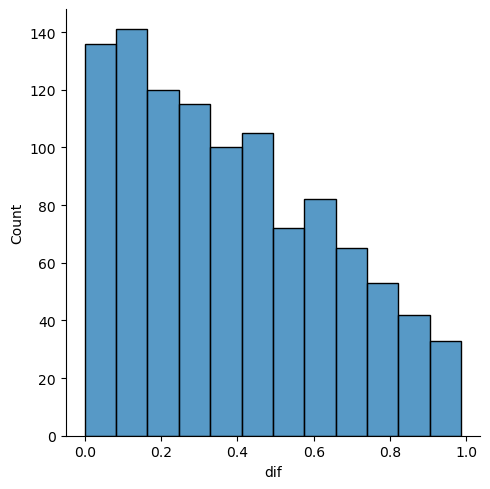

In [26]:
sns.displot(df[df.prediction=='doublet'], x='dif')

In [27]:
# Select those doublets which the difference between the singlet and doublet is more than 0.5
doublets = df[(df.prediction =='doublet') & (df.dif > 0.5)]
doublets

doublet   singlet prediction       dif
TAGGTACCATGGCCAC-1  0.755936  0.244064    doublet  0.511872
ATTCACTGTAACAGGC-1  0.897419  0.102581    doublet  0.794838
TTGGGTACACGACAAG-1  0.863216  0.136784    doublet  0.726431
ACTGATGTCTGCACCT-1  0.925272  0.074728    doublet  0.850544
ACTTCCGCACAACGCC-1  0.980497  0.019503    doublet  0.960994
...                      ...       ...        ...       ...
CCGGGTAGTCGCATGC-1  0.929856  0.070144    doublet  0.859713
CAATACGCAATGTGGG-1  0.818838  0.181162    doublet  0.637676
TACCTCGCATCGGAGA-1  0.900810  0.099190    doublet  0.801620
AGTTAGCAGCTGGTGA-1  0.825340  0.174660    doublet  0.650681
ATTCGTTGTTATGTGC-1  0.853479  0.146521    doublet  0.706959

[340 rows x 4 columns]

In [28]:
# Load the first sample and trasnpose to put the cells on rows and genes on columns
adata = sc.read_csv('raw_counts/GSM5226574_C51ctr_raw_counts.csv').T
# This is useful if the original cell IDs contain suffixes (e.g., "-1", "-2") that need to be removed for clarity or consistency.
adata.obs.index = adata.obs.index.map(lambda x: x[:-2])
adata

AnnData object with n_obs × n_vars = 6099 × 34546

In [29]:
# Check if the cells indices from the original sample are among doublets dataframe
adata.obs['doublet'] = adata.obs.index.isin(doublets.index)

In [30]:
adata.obs

doublet
TAGGTACCATGGCCAC-1     True
ATTCACTGTAACAGGC-1     True
TAACTTCCAACCACGC-1    False
TTGGGTACACGACAAG-1     True
AGGCCACAGAGTCACG-1    False
...                     ...
CGCCATTGTTTGCCGG-1    False
CACTGGGGTCTACGTA-1    False
CATACTTGTAGAGGAA-1    False
TTTGGTTTCCACGGAC-1    False
ATGCATGAGTCATGAA-1    False

[6099 rows x 1 columns]

In [31]:
# Filter out all the cells which are labeled True (they are doublets)
adata = adata[~adata.obs.doublet]
adata

View of AnnData object with n_obs × n_vars = 5759 × 34546
    obs: 'doublet'

## 4. Preprocessing

In [32]:
adata.var

Empty DataFrameView
Columns: []
Index: [AL627309.1, AL627309.5, AL627309.4, AL669831.2, LINC01409, FAM87B, LINC01128, LINC00115, FAM41C, AL645608.6, AL645608.2, LINC02593, SAMD11, NOC2L, KLHL17, PLEKHN1, PERM1, AL645608.7, HES4, ISG15, AL645608.1, AGRN, C1orf159, AL390719.3, LINC01342, AL390719.2, TTLL10-AS1, TTLL10, TNFRSF18, TNFRSF4, SDF4, B3GALT6, C1QTNF12, UBE2J2, LINC01786, SCNN1D, ACAP3, PUSL1, INTS11, AL139287.1, CPTP, DVL1, MXRA8, AURKAIP1, CCNL2, MRPL20-AS1, MRPL20, AL391244.2, ANKRD65, AL391244.1, LINC01770, VWA1, ATAD3C, ATAD3B, ATAD3A, TMEM240, SSU72, AL645728.1, FNDC10, AL691432.4, AL691432.2, MIB2, MMP23B, CDK11B, FO704657.1, SLC35E2B, CDK11A, SLC35E2A, NADK, GNB1, AL109917.1, CALML6, TMEM52, CFAP74, GABRD, AL391845.1, PRKCZ, AL590822.2, PRKCZ-AS1, FAAP20, AL590822.1, SKI, AL590822.3, MORN1, AL589739.1, AL513477.2, RER1, PEX10, PLCH2, AL139246.4, PANK4, HES5, AL139246.5, TNFRSF14-AS1, TNFRSF14, AL139246.3, PRXL2B, MMEL1, TTC34, AC242022.2, ...]

[34546 rows x 0 columns]

### 4.1) Filter the mitochondrial and ribosomal genes
- If it's human genome these genes are recognized by MT. However, if the genome belongs to mouse it is specified by `Mt`.

In [33]:
adata.var[adata.var.index.str.startswith('MT-')]

Empty DataFrame
Columns: []
Index: [MT-ND1, MT-ND2, MT-CO1, MT-CO2, MT-ATP8, MT-ATP6, MT-CO3, MT-ND3, MT-ND4L, MT-ND4, MT-ND5, MT-ND6, MT-CYB]

In [34]:
# Make a new column and add True if the gene is Mito. otherwise False.
adata.var['mt'] = adata.var.index.str.startswith('MT-')
adata.var

/local/f.amirvahedibonab01_3517460/ipykernel_1006606/1750992037.py:2: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var.index.str.startswith('MT-')


mt
AL627309.1  False
AL627309.5  False
AL627309.4  False
AL669831.2  False
LINC01409   False
...           ...
VN1R2       False
AL031676.1  False
SMIM34A     False
AL050402.1  False
AL445072.1  False

[34546 rows x 1 columns]

In [35]:
# Do the same for Ribosomal genes
# Use a list of ribosomal genes
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [36]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header= None)
ribo_genes

0
0          FAU
1       MRPL13
2        RPL10
3       RPL10A
4       RPL10L
..         ...
83        RPS9
84        RPSA
85     RSL24D1
86  RSL24D1P11
87       UBA52

[88 rows x 1 columns]

In [37]:
ribo_genes[0].values

array(['FAU', 'MRPL13', 'RPL10', 'RPL10A', 'RPL10L', 'RPL11', 'RPL12',
       'RPL13', 'RPL13A', 'RPL14', 'RPL15', 'RPL17', 'RPL18', 'RPL18A',
       'RPL19', 'RPL21', 'RPL22', 'RPL22L1', 'RPL23', 'RPL23A', 'RPL24',
       'RPL26', 'RPL26L1', 'RPL27', 'RPL27A', 'RPL28', 'RPL29', 'RPL3',
       'RPL30', 'RPL31', 'RPL32', 'RPL34', 'RPL35', 'RPL35A', 'RPL36',
       'RPL36A', 'RPL36AL', 'RPL37', 'RPL37A', 'RPL38', 'RPL39', 'RPL3L',
       'RPL4', 'RPL41', 'RPL5', 'RPL6', 'RPL7', 'RPL7A', 'RPL8', 'RPL9',
       'RPLP0', 'RPLP1', 'RPLP2', 'RPS10', 'RPS11', 'RPS12', 'RPS13',
       'RPS15', 'RPS15A', 'RPS16', 'RPS17', 'RPS18', 'RPS19', 'RPS2',
       'RPS20', 'RPS21', 'RPS23', 'RPS24', 'RPS25', 'RPS26', 'RPS27',
       'RPS27A', 'RPS27L', 'RPS28', 'RPS29', 'RPS3', 'RPS3A', 'RPS4X',
       'RPS4Y1', 'RPS5', 'RPS6', 'RPS7', 'RPS8', 'RPS9', 'RPSA',
       'RSL24D1', 'RSL24D1P11', 'UBA52'], dtype=object)

In [38]:
adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
adata.var

mt   ribo
AL627309.1  False  False
AL627309.5  False  False
AL627309.4  False  False
AL669831.2  False  False
LINC01409   False  False
...           ...    ...
VN1R2       False  False
AL031676.1  False  False
SMIM34A     False  False
AL050402.1  False  False
AL445072.1  False  False

[34546 rows x 2 columns]

In [39]:
# Calculate quality control metrics
# - 'adata' is the AnnData object that contains your single-cell RNA-seq data.
# - 'qc_vars' are the names of the variables used for calculating QC metrics. 
#   Here, 'mt' typically refers to mitochondrial genes and 'ribo' refers to ribosomal genes.
# - 'percent_top' is set to None, meaning you are not calculating the percentage of counts in the top n genes.
# - 'log1p=False' indicates that the logarithm of 1 plus the value is not taken.
# - 'inplace=True' means the results are stored directly in the AnnData object without returning a new one.
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

# Access the variable annotations (features/genes) in the AnnData object.
adata.var


mt   ribo  n_cells_by_counts  mean_counts  \
AL627309.1  False  False                  7     0.001215   
AL627309.5  False  False                 30     0.005209   
AL627309.4  False  False                  3     0.000521   
AL669831.2  False  False                  2     0.000347   
LINC01409   False  False                236     0.044452   
...           ...    ...                ...          ...   
VN1R2       False  False                  0     0.000000   
AL031676.1  False  False                  0     0.000000   
SMIM34A     False  False                  0     0.000000   
AL050402.1  False  False                  0     0.000000   
AL445072.1  False  False                  0     0.000000   

            pct_dropout_by_counts  total_counts  
AL627309.1              99.878451           7.0  
AL627309.5              99.479076          30.0  
AL627309.4              99.947908           3.0  
AL669831.2              99.965272           2.0  
LINC01409               95.902066         256.0  
...                           ...           ...  
VN1R2                  100.000000           0.0  
AL031676.1             100.000000           0.0  
SMIM34A                100.000000           0.0  
AL050402.1             100.000000           0.0  
AL445072.1             100.000000           0.0  

[34546 rows x 6 columns]

- **mt**: Indicates whether the gene is a mitochondrial gene. (`True` or `False`)

- **ribo**: Indicates whether the gene is a ribosomal gene. (`True` or `False`)

- **n_cells_by_counts**: The number of cells in which the gene has non-zero counts.

- **mean_counts**: The average expression count of the gene across all cells.

- **pct_dropout_by_counts**: The percentage of cells in which the gene is not detected (i.e., has zero counts).

- **total_counts**: The total count of the gene's expression across all cells.

In [40]:
adata.obs

doublet  n_genes_by_counts  total_counts  total_counts_mt  \
TAACTTCCAACCACGC-1    False               5158       15645.0            221.0   
AGGCCACAGAGTCACG-1    False               5544       13217.0            417.0   
CACTGAAGTCGAAGCA-1    False               5487       12725.0            355.0   
TTACCGCCACTCAGAT-1    False               4144       11369.0             39.0   
TTGGTTTTCCTAGCTC-1    False               3902       11472.0            463.0   
...                     ...                ...           ...              ...   
CGCCATTGTTTGCCGG-1    False                355         410.0              3.0   
CACTGGGGTCTACGTA-1    False                346         403.0              0.0   
CATACTTGTAGAGGAA-1    False                360         410.0              2.0   
TTTGGTTTCCACGGAC-1    False                299         405.0              0.0   
ATGCATGAGTCATGAA-1    False                351         411.0              0.0   

                    pct_counts_mt  total_counts_ribo  pct_counts_ribo  
TAACTTCCAACCACGC-1       1.412592              211.0         1.348674  
AGGCCACAGAGTCACG-1       3.155028               82.0         0.620413  
CACTGAAGTCGAAGCA-1       2.789784               82.0         0.644401  
TTACCGCCACTCAGAT-1       0.343038                5.0         0.043979  
TTGGTTTTCCTAGCTC-1       4.035913               13.0         0.113319  
...                           ...                ...              ...  
CGCCATTGTTTGCCGG-1       0.731707                0.0         0.000000  
CACTGGGGTCTACGTA-1       0.000000                0.0         0.000000  
CATACTTGTAGAGGAA-1       0.487805                0.0         0.000000  
TTTGGTTTCCACGGAC-1       0.000000                2.0         0.493827  
ATGCATGAGTCATGAA-1       0.000000                0.0         0.000000  

[5759 rows x 7 columns]

In [41]:
adata.var.sort_values('n_cells_by_counts')

mt   ribo  n_cells_by_counts  mean_counts  \
AL445072.1  False  False                  0     0.000000   
AC026787.1  False  False                  0     0.000000   
AC106771.1  False  False                  0     0.000000   
AC114964.2  False  False                  0     0.000000   
AC026785.2  False  False                  0     0.000000   
...           ...    ...                ...          ...   
AKAP13      False  False               4152     2.893558   
MBNL1       False  False               4239     2.720611   
NEAT1       False  False               4252     5.103143   
ZBTB20      False  False               4389     2.463796   
MALAT1      False  False               5750    65.396248   

            pct_dropout_by_counts  total_counts  
AL445072.1             100.000000           0.0  
AC026787.1             100.000000           0.0  
AC106771.1             100.000000           0.0  
AC114964.2             100.000000           0.0  
AC026785.2             100.000000           0.0  
...                           ...           ...  
AKAP13                  27.904150       16664.0  
MBNL1                   26.393471       15668.0  
NEAT1                   26.167737       29389.0  
ZBTB20                  23.788852       14189.0  
MALAT1                   0.156277      376617.0  

[34546 rows x 6 columns]

In [42]:
# Filter out the genes that were found less than 3 cells 
sc.pp.filter_genes(adata, min_cells=3)

In [43]:
adata.var.sort_values('n_cells_by_counts')

mt   ribo  n_cells_by_counts  mean_counts  \
AC105046.2  False  False                  3     0.000695   
AL354920.1  False  False                  3     0.000521   
LNCARSR     False  False                  3     0.000521   
AC090282.1  False  False                  3     0.000521   
OR3A3       False  False                  3     0.000521   
...           ...    ...                ...          ...   
AKAP13      False  False               4152     2.893558   
MBNL1       False  False               4239     2.720611   
NEAT1       False  False               4252     5.103143   
ZBTB20      False  False               4389     2.463796   
MALAT1      False  False               5750    65.396248   

            pct_dropout_by_counts  total_counts  n_cells  
AC105046.2              99.947908           4.0        3  
AL354920.1              99.947908           3.0        3  
LNCARSR                 99.947908           3.0        3  
AC090282.1              99.947908           3.0        3  
OR3A3                   99.947908           3.0        3  
...                           ...           ...      ...  
AKAP13                  27.904150       16664.0     4152  
MBNL1                   26.393471       15668.0     4239  
NEAT1                   26.167737       29389.0     4252  
ZBTB20                  23.788852       14189.0     4389  
MALAT1                   0.156277      376617.0     5750  

[24294 rows x 7 columns]

In [44]:
adata.obs

doublet  n_genes_by_counts  total_counts  total_counts_mt  \
TAACTTCCAACCACGC-1    False               5158       15645.0            221.0   
AGGCCACAGAGTCACG-1    False               5544       13217.0            417.0   
CACTGAAGTCGAAGCA-1    False               5487       12725.0            355.0   
TTACCGCCACTCAGAT-1    False               4144       11369.0             39.0   
TTGGTTTTCCTAGCTC-1    False               3902       11472.0            463.0   
...                     ...                ...           ...              ...   
CGCCATTGTTTGCCGG-1    False                355         410.0              3.0   
CACTGGGGTCTACGTA-1    False                346         403.0              0.0   
CATACTTGTAGAGGAA-1    False                360         410.0              2.0   
TTTGGTTTCCACGGAC-1    False                299         405.0              0.0   
ATGCATGAGTCATGAA-1    False                351         411.0              0.0   

                    pct_counts_mt  total_counts_ribo  pct_counts_ribo  
TAACTTCCAACCACGC-1       1.412592              211.0         1.348674  
AGGCCACAGAGTCACG-1       3.155028               82.0         0.620413  
CACTGAAGTCGAAGCA-1       2.789784               82.0         0.644401  
TTACCGCCACTCAGAT-1       0.343038                5.0         0.043979  
TTGGTTTTCCTAGCTC-1       4.035913               13.0         0.113319  
...                           ...                ...              ...  
CGCCATTGTTTGCCGG-1       0.731707                0.0         0.000000  
CACTGGGGTCTACGTA-1       0.000000                0.0         0.000000  
CATACTTGTAGAGGAA-1       0.487805                0.0         0.000000  
TTTGGTTTCCACGGAC-1       0.000000                2.0         0.493827  
ATGCATGAGTCATGAA-1       0.000000                0.0         0.000000  

[5759 rows x 7 columns]

In [45]:
# Sort based on the total counts
adata.obs.sort_values('total_counts')

doublet  n_genes_by_counts  total_counts  total_counts_mt  \
CTCAACCGTTTGGGAG-1    False                325         401.0              0.0   
TGGTACAGTTGGTGTT-1    False                323         401.0              0.0   
CGAGAAGGTGAACTAA-1    False                308         401.0              0.0   
GTCGTTCTCCAAGGGA-1    False                300         401.0              0.0   
AGGCATTCATCCGTTC-1    False                290         401.0              1.0   
...                     ...                ...           ...              ...   
TTACCGCCACTCAGAT-1    False               4144       11369.0             39.0   
TTGGTTTTCCTAGCTC-1    False               3902       11472.0            463.0   
CACTGAAGTCGAAGCA-1    False               5487       12725.0            355.0   
AGGCCACAGAGTCACG-1    False               5544       13217.0            417.0   
TAACTTCCAACCACGC-1    False               5158       15645.0            221.0   

                    pct_counts_mt  total_counts_ribo  pct_counts_ribo  
CTCAACCGTTTGGGAG-1       0.000000                0.0         0.000000  
TGGTACAGTTGGTGTT-1       0.000000                0.0         0.000000  
CGAGAAGGTGAACTAA-1       0.000000                0.0         0.000000  
GTCGTTCTCCAAGGGA-1       0.000000                0.0         0.000000  
AGGCATTCATCCGTTC-1       0.249377                0.0         0.000000  
...                           ...                ...              ...  
TTACCGCCACTCAGAT-1       0.343038                5.0         0.043979  
TTGGTTTTCCTAGCTC-1       4.035913               13.0         0.113319  
CACTGAAGTCGAAGCA-1       2.789784               82.0         0.644401  
AGGCCACAGAGTCACG-1       3.155028               82.0         0.620413  
TAACTTCCAACCACGC-1       1.412592              211.0         1.348674  

[5759 rows x 7 columns]

In [46]:
#sc.pp.filter_cells(adata, min_genes=200)

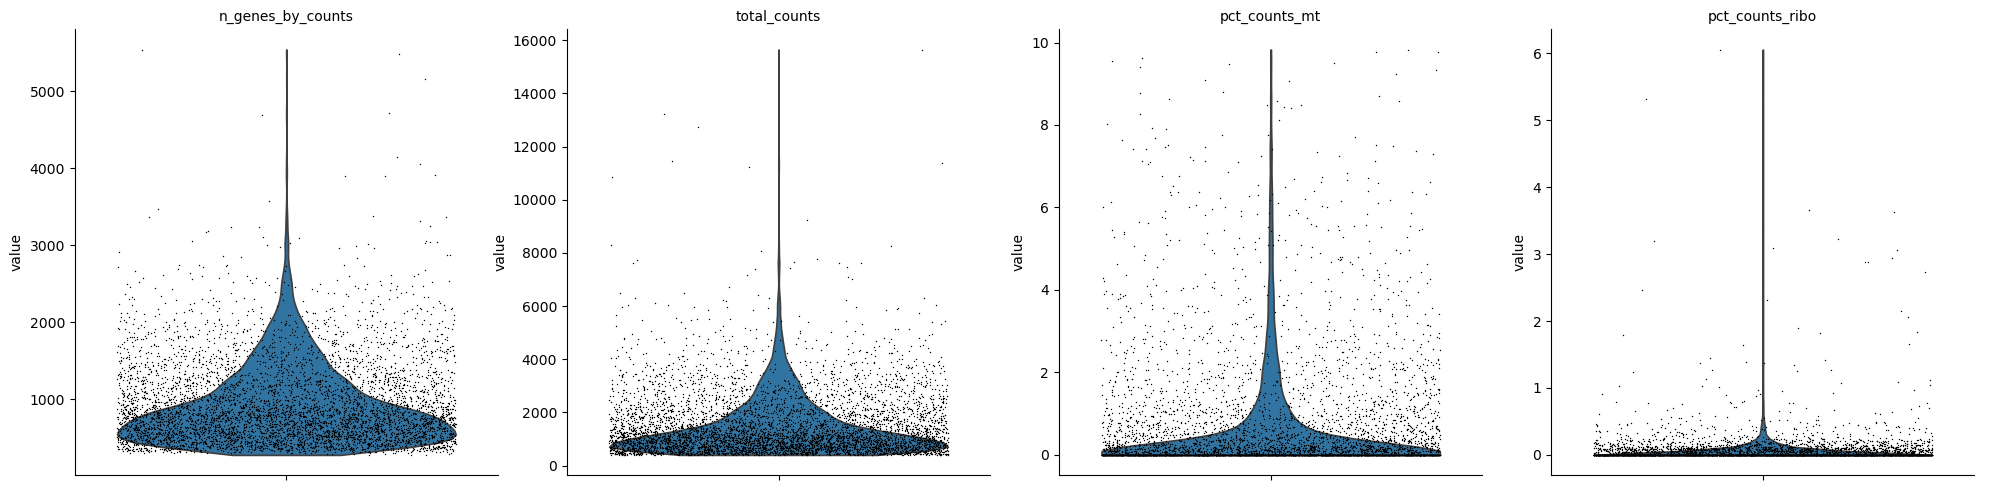

In [47]:
# Use the QC-matrix to get rid of the outliers
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

- The effect of artifacts can be seen on the `count` plots.
- Also, if there is problem with sequencing or if the cell is dying there would be high count of `mt` genes. Usually, filter value for `mt` is set around 20%.

In [48]:
# Get the 98th percentile value of the number of genes by counts per cell
# - 'adata.obs.n_genes_by_counts.values' retrieves the number of genes detected by counts for each cell from the AnnData object.
# - 'np.quantile' calculates the specified quantile of the input array.
# - '.98' specifies that we want the 98th percentile.
# This will give us a threshold value above which the top 2% of cells, in terms of number of genes detected, lie.
upper_limit = np.quantile(adata.obs.n_genes_by_counts.values, .98)

# Display the 98th percentile value
upper_limit

2323.0

In [49]:
adata = adata[adata.obs.n_genes_by_counts < upper_limit]

In [50]:
adata.obs

doublet  n_genes_by_counts  total_counts  total_counts_mt  \
CCTCAACCATACAGGG-1    False               2276        5434.0             38.0   
ACAAAGATCCACAGGC-1    False               2310        5504.0              1.0   
ATACTTCCAAGGTCTT-1    False               2122        5252.0              1.0   
TCAATCTTCGCCAATA-1    False               2307        5062.0              0.0   
GGGTCACTCTATTCGT-1    False               2286        5056.0              0.0   
...                     ...                ...           ...              ...   
CGCCATTGTTTGCCGG-1    False                355         410.0              3.0   
CACTGGGGTCTACGTA-1    False                346         403.0              0.0   
CATACTTGTAGAGGAA-1    False                360         410.0              2.0   
TTTGGTTTCCACGGAC-1    False                299         405.0              0.0   
ATGCATGAGTCATGAA-1    False                351         411.0              0.0   

                    pct_counts_mt  total_counts_ribo  pct_counts_ribo  
CCTCAACCATACAGGG-1       0.699301                0.0         0.000000  
ACAAAGATCCACAGGC-1       0.018169                1.0         0.018169  
ATACTTCCAAGGTCTT-1       0.019040                4.0         0.076161  
TCAATCTTCGCCAATA-1       0.000000                0.0         0.000000  
GGGTCACTCTATTCGT-1       0.000000                1.0         0.019778  
...                           ...                ...              ...  
CGCCATTGTTTGCCGG-1       0.731707                0.0         0.000000  
CACTGGGGTCTACGTA-1       0.000000                0.0         0.000000  
CATACTTGTAGAGGAA-1       0.487805                0.0         0.000000  
TTTGGTTTCCACGGAC-1       0.000000                2.0         0.493827  
ATGCATGAGTCATGAA-1       0.000000                0.0         0.000000  

[5642 rows x 7 columns]

In [51]:
# Filters out cells that more than 20% of their reads comes from mitochondrial genes.
adata = adata[adata.obs.pct_counts_mt < 20]
# Filter out cells with ribosomal gene expression greater than 2%
adata = adata[adata.obs.pct_counts_ribo < 2]

In [52]:
adata

View of AnnData object with n_obs × n_vars = 5626 × 24294
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

## 5) Normalization
- In single-cell sequencing, there is some noise because of sequencing and as a result, discrepancies arose between the cells and even the results from the same cell type.

In [53]:
# See the count differences between cells
adata.X.sum(axis = 1)

array([5433., 5502., 5250., ...,  410.,  405.,  410.], dtype=float32)

In [54]:
# Normalize the count in each cell
sc.pp.normalize_total(adata, target_sum=1e4) # Normalize very cell to 10,000 UMI

/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


### Explanation with an Example:
Normalization to a constant sum (e.g., 10,000 UMI) is a common practice in single-cell RNA sequencing to ensure that the comparison between cells is not biased by differences in sequencing depth.

#### Example:
Imagine you have 3 cells with the following total counts (UMIs):
- **Cell 1**: 15,000 UMIs
- **Cell 2**: 8,000 UMIs
- **Cell 3**: 12,000 UMIs

The goal is to normalize each cell to 10,000 UMIs.

#### Steps:
1. **Calculate the Normalization Factor**:
   - For **Cell 1**: Normalization Factor = 10,000 / 15,000 = 0.6667
   - For **Cell 2**: Normalization Factor = 10,000 / 8,000 = 1.25
   - For **Cell 3**: Normalization Factor = 10,000 / 12,000 = 0.8333

2. **Apply the Normalization**:
   - Multiply the counts of each gene in the cell by the normalization factor.
   - For example, if a gene has a count of 100 in **Cell 1**:
     - Normalized count for that gene = 100 * 0.6667 ≈ 66.67

This ensures that each cell has the same total number of counts (10,000 in this case), making the data comparable across cells by mitigating the effects of varying sequencing depths.

This normalization helps ensure that differences in gene expression levels between cells are due to biological differences rather than technical variations in sequencing depth.

In [55]:
adata.X.sum(axis=1)

array([10000., 10000., 10000., ..., 10000., 10000., 10000.], dtype=float32)

In [56]:
# Convert to the log count
sc.pp.log1p(adata)
adata.X.sum(axis=1)

array([3285.3794, 3163.8865, 2858.1602, ..., 1191.2706, 1022.7511,
       1162.8785], dtype=float32)

In [57]:
adata.raw = adata

## 6. Clustering

In [58]:
# This method scans the dataset and identifies the top 2000 highly variable genes, which are often of interest in downstream analysis.
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
adata.var

mt   ribo  n_cells_by_counts  mean_counts  \
AL627309.1  False  False                  7     0.001215   
AL627309.5  False  False                 30     0.005209   
AL627309.4  False  False                  3     0.000521   
LINC01409   False  False                236     0.044452   
FAM87B      False  False                  6     0.001042   
...           ...    ...                ...          ...   
AL354822.1  False  False                120     0.021532   
AL592183.1  False  False                900     0.185796   
AC240274.1  False  False                151     0.026914   
AC007325.4  False  False                  4     0.000695   
AC007325.2  False  False                  6     0.001042   

            pct_dropout_by_counts  total_counts  n_cells  highly_variable  \
AL627309.1              99.878451           7.0        7             True   
AL627309.5              99.479076          30.0       30            False   
AL627309.4              99.947908           3.0        3            False   
LINC01409               95.902066         256.0      236            False   
FAM87B                  99.895815           6.0        6            False   
...                           ...           ...      ...              ...   
AL354822.1              97.916305         124.0      120            False   
AL592183.1              84.372287        1070.0      900            False   
AC240274.1              97.378017         155.0      151            False   
AC007325.4              99.930543           4.0        4            False   
AC007325.2              99.895815           6.0        6            False   

               means  dispersions  dispersions_norm  
AL627309.1  0.010869     2.764108          1.280277  
AL627309.5  0.030036     2.266395         -0.226059  
AL627309.4  0.002469     1.702832         -1.931694  
LINC01409   0.263260     2.327954         -0.039749  
FAM87B      0.007078     1.947443         -1.191372  
...              ...          ...               ...  
AL354822.1  0.153988     2.413537          0.219270  
AL592183.1  0.874638     2.503638         -0.388805  
AC240274.1  0.154188     2.285617         -0.167884  
AC007325.4  0.002967     1.579809         -2.304025  
AC007325.2  0.006255     1.995233         -1.046736  

[24294 rows x 11 columns]

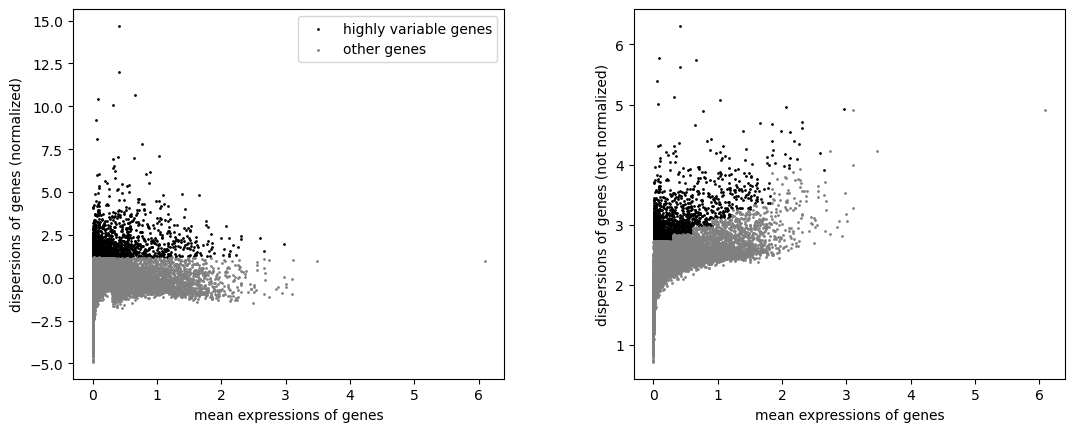

In [59]:
sc.pl.highly_variable_genes(adata)

- The genes with higher dispersion are considered as `highly variable genes`.
---
Dispersion is a measure of how much a particular gene's expression varies across different cells in a dataset. It helps identify genes that have high variability, which can be crucial for distinguishing between different cell types or states.

### Example:
Imagine you have gene expression data for three genes (A, B, and C) across five cells. The expression values are as follows:

| Cell | Gene A | Gene B | Gene C |
|------|--------|--------|--------|
| 1    | 10     | 5      | 20     |
| 2    | 12     | 4      | 18     |
| 3    | 11     | 6      | 22     |
| 4    | 9      | 5      | 21     |
| 5    | 13     | 4      | 19     |

### Calculation:
1. **Mean Expression**:
   - Gene A: (10 + 12 + 11 + 9 + 13) / 5 = 11
   - Gene B: (5 + 4 + 6 + 5 + 4) / 5 = 4.8
   - Gene C: (20 + 18 + 22 + 21 + 19) / 5 = 20

2. **Variance**:
   - Gene A: ((10-11)² + (12-11)² + (11-11)² + (9-11)² + (13-11)²) / 5 = 2
   - Gene B: ((5-4.8)² + (4-4.8)² + (6-4.8)² + (5-4.8)² + (4-4.8)²) / 5 = 0.56
   - Gene C: ((20-20)² + (18-20)² + (22-20)² + (21-20)² + (19-20)²) / 5 = 2

3. **Dispersion**:
   Dispersion is typically calculated as the variance divided by the mean expression.

   - Gene A: 2 / 11 ≈ 0.18
   - Gene B: 0.56 / 4.8 ≈ 0.12
   - Gene C: 2 / 20 = 0.1

### Interpretation:
- **Gene A** has the highest dispersion (0.18), indicating that its expression varies more widely across the cells compared to Genes B and C.
- **Gene B** and **Gene C** have lower dispersion, suggesting that their expression is relatively stable across different cells.

Identifying highly variable genes (high dispersion) is crucial in many biological analyses, such as single-cell RNA sequencing, to distinguish different cell types or states effectively.

In [60]:
# Subset the data to include only highly variable genes.
adata = adata[:, adata.var.highly_variable]

In [61]:
# Regress out specific variables from the gene expression data.
# This function removes the effects of 'total_counts', 'pct_counts_mt', and 'pct_counts_ribo' from the expression values.
# This helps to correct for confounding factors like sequencing depth, mitochondrial gene content, and ribosomal gene content,
# ensuring that these factors do not skew the analysis.
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:672: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


### Example:

Let's consider a simple example with a small dataset to illustrate this process.

#### Original Data:
- **Gene Expression Matrix (adata.X)**:
  ```
  Cell  | Gene1 | Gene2 | Gene3
  ----- | ----- | ----- | -----
  Cell1 | 100   | 200   | 300
  Cell2 | 150   | 250   | 350
  Cell3 | 120   | 220   | 320
  ```

- **Confounding Factors (adata.obs)**:
  ```
  Cell  | total_counts | pct_counts_mt | pct_counts_ribo
  ----- | ------------ | ------------- | ---------------
  Cell1 | 600          | 5             | 10
  Cell2 | 750          | 6             | 12
  Cell3 | 660          | 5.5           | 11
  ```

#### Regression Process:
1. **Model the Effect**:
   - The function models the gene expression as a linear combination of the confounding factors.
   - For example, it might fit a linear model like:
     ```
     Gene1_expression ~ total_counts + pct_counts_mt + pct_counts_ribo
     ```

2. **Subtract the Effect**:
   - The estimated contribution of the confounding factors is subtracted from the observed gene expression values.
   - This results in adjusted gene expression values that are less influenced by the confounding factors.

#### Adjusted Data:
- **Adjusted Gene Expression Matrix (adata.X)**:
  ```
  Cell  | Gene1 | Gene2 | Gene3
  ----- | ----- | ----- | -----
  Cell1 | 90    | 180   | 270
  Cell2 | 140   | 230   | 320
  Cell3 | 110   | 210   | 310
  ```

### Summary:
- **Original Data**: Contains gene expression values along with confounding factors.
- **Regress Out**: Removes the influence of specified confounding factors through linear regression.
- **Adjusted Data**: Gene expression values are corrected for confounding factors, making them more suitable for downstream analysis.

This process helps ensure that your analysis is not biased by technical variations, providing a clearer view of the biological signals. 

In [62]:
# Normalize each gene to the unit variance of that gene
sc.pp.scale(adata, max_value=10)

- The expression values of each gene are normalized to have a mean of 0 and a standard deviation of 1.

- Extreme values beyond ±10 are capped to prevent outliers from skewing the analysis.

This scaling step is crucial in single-cell RNA-seq analysis to ensure that subsequent analyses (like clustering and dimensionality reduction) are not dominated by genes with inherently higher expression variability.

In [ ]:
# Run PCA to reduce the dimension of data
sc.tl.pca(adata, svd_solver='arpach')

/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:495: UserWarning: Ignoring arpach and using arpack, sklearn.decomposition.PCA only supports {'arpack', 'auto', 'full', 'randomized'}
  warnings.warn(


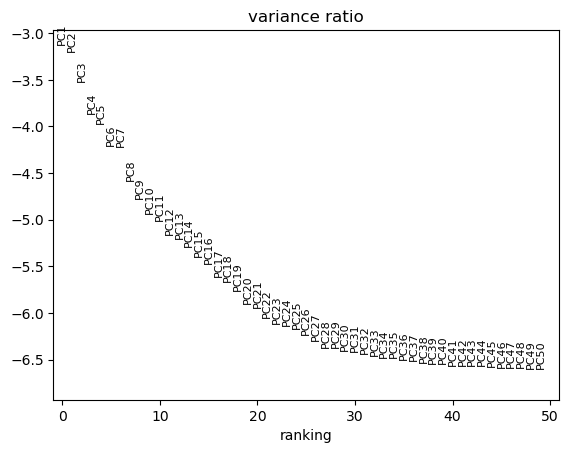

In [64]:
# Find the elbow of the plot
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

This **PCA variance ratio plot** is commonly used in **single-cell RNA-seq (scRNA-seq) analysis** to determine how many principal components (PCs) should be retained for downstream analysis. Here's what it shows:

**Key Points:**
1. **X-axis:** Number of principal components (PCs), up to 50 in this case.
2. **Y-axis:** Log-transformed variance ratio (explained variance per PC).
3. **Elbow Point:** The plot shows a sharp decline in variance explained by each PC. The "elbow" (a bending point in the curve) suggests the optimal number of PCs to retain. After this point, adding more PCs contributes little to variance explanation.
4. **Why It's Important:** 
   - In scRNA-seq, selecting too many PCs may add noise, while selecting too few may miss key biological variation.
   - The **elbow method** helps determine a cutoff for dimensionality reduction before **clustering, visualization (UMAP/tSNE), and downstream analysis**.

**Next Steps:**
- Identify the **elbow point** (e.g., around **10–20 PCs**).
- Use this number of PCs in **clustering (e.g., Leiden, Louvain)** or **embedding (e.g., UMAP/tSNE)**.



In [65]:
# Select the neighbors of the cells using the top 30 principal components
# - 'adata' is the AnnData object containing your single-cell RNA-seq data.
# - 'sc.pp.neighbors' computes a k-nearest neighbors (k-NN) graph of cells.
# - 'n_pcs=30' specifies that the first 30 principal components (PCs) should be used to compute the neighbors.
# This step is crucial for downstream analyses like clustering and visualization, as it identifies similar cells based on their gene expression profiles.
sc.pp.neighbors(adata, n_pcs=30)


In [66]:
adata

AnnData object with n_obs × n_vars = 5626 × 2000
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

- `distances` and `connectivities` are added as a result of neighbor finding.

In [67]:
# Show the connectivity (distance) matrix of cells
adata.obsp['connectivities'].toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.32727885, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.32727885, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [68]:
# Use umap to project from data 30 dimensions to 2 dimensions
sc.tl.umap(adata)

In [69]:
sc.tl.leiden(adata, resolution= 0.5)
# resolution: closer to 1 = more clusters
# closer to 0 = fewer clsuters
adata.obs
# The new column with the leiden label is added

/local/f.amirvahedibonab01_3517460/ipykernel_1006606/3397403411.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution= 0.5)


doublet  n_genes_by_counts  total_counts  total_counts_mt  \
CCTCAACCATACAGGG-1    False               2276        5434.0             38.0   
ACAAAGATCCACAGGC-1    False               2310        5504.0              1.0   
ATACTTCCAAGGTCTT-1    False               2122        5252.0              1.0   
TCAATCTTCGCCAATA-1    False               2307        5062.0              0.0   
GGGTCACTCTATTCGT-1    False               2286        5056.0              0.0   
...                     ...                ...           ...              ...   
CGCCATTGTTTGCCGG-1    False                355         410.0              3.0   
CACTGGGGTCTACGTA-1    False                346         403.0              0.0   
CATACTTGTAGAGGAA-1    False                360         410.0              2.0   
TTTGGTTTCCACGGAC-1    False                299         405.0              0.0   
ATGCATGAGTCATGAA-1    False                351         411.0              0.0   

                    pct_counts_mt  total_counts_ribo  pct_counts_ribo leiden  
CCTCAACCATACAGGG-1       0.699301                0.0         0.000000     11  
ACAAAGATCCACAGGC-1       0.018169                1.0         0.018169      2  
ATACTTCCAAGGTCTT-1       0.019040                4.0         0.076161      2  
TCAATCTTCGCCAATA-1       0.000000                0.0         0.000000      2  
GGGTCACTCTATTCGT-1       0.000000                1.0         0.019778      2  
...                           ...                ...              ...    ...  
CGCCATTGTTTGCCGG-1       0.731707                0.0         0.000000      7  
CACTGGGGTCTACGTA-1       0.000000                0.0         0.000000      1  
CATACTTGTAGAGGAA-1       0.487805                0.0         0.000000      0  
TTTGGTTTCCACGGAC-1       0.000000                2.0         0.493827      6  
ATGCATGAGTCATGAA-1       0.000000                0.0         0.000000      1  

[5626 rows x 8 columns]

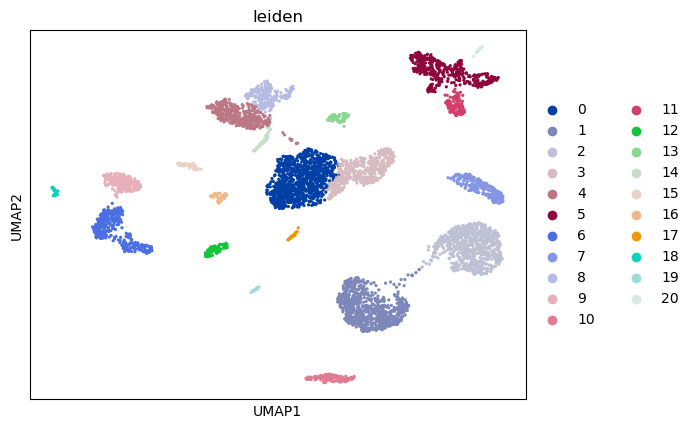

In [70]:
# Plot cells by umap and color based on leiden label
sc.pl.umap(adata, color=['leiden'])

In [ ]:
# Integration of multiple samples
def pp(csv_path):
    # Read the CSV file into an AnnData object and transpose it
    adata = sc.read_csv(csv_path).T

    # Filter genes that are expressed in fewer than 10 cells
    # Each function call updates adata in-place. 
    sc.pp.filter_genes(adata, min_cells=10)

    # Identify the top 2000 highly variable genes using Seurat v3 flavor. 
    # adata objest is updated in-place and it is passed down as an input to other functions. 
    sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True, flavor='seurat_v3')

    # Set up the SCVI model with the AnnData object
    scvi.model.SCVI.setup_anndata(adata)

    # Initialize and train the SCVI model
    vae = scvi.model.SCVI(adata)
    vae.train()

    # Create a SOLO model from the trained SCVI model and train it
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()

    # Predict doublets with the SOLO model
    df = solo.predict()
    df['prediction'] = solo.predict(soft=False)

    # Modify the index to match the original cell barcodes
    df.index = df.index.map(lambda x: x[:-2])

    # Calculate the difference between doublet and singlet probabilities
    df['dif'] = df.doublet - df.singlet

    # Identify potential doublets based on predictions and the difference in probabilities
    doublelets = df[(df.prediction == 'doublet') & (df.dif > 1)]

    # Read the CSV file again into an AnnData object and transpose it
    adata = sc.read_csv(csv_path).T

    # Extract the sample name from the CSV path and add it to the AnnData object
    adata.obs['Sample'] = csv_path.split('_')[2]  # e.g., 'raw_counts/GSM5226574_C51ctr_raw_counts.csv'

    # Annotate cells as doublets based on the previous predictions
    adata.obs['doublet'] = adata.obs.index.isin(doublets.index)

    # Filter out doublets
    adata = adata[~adata.obs.doublet]

    # Filter cells with fewer than 200 genes detected
    sc.pp.filter_cells(adata, min_genes=200)

    # Annotate mitochondrial genes
    adata.var['mt'] = adata.var_names.str.startswith('mt-')

    # Annotate ribosomal genes
    adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

    # Calculate QC metrics for the dataset
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

    # Determine the 98th percentile value for the number of genes detected per cell
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)

    # Filter out cells with more genes detected than the 98th percentile
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]

    # Filter out cells with high mitochondrial content (more than 20%)
    adata = adata[adata.obs.pct_counts_mt < 20]

    # Filter out cells with high ribosomal content (more than 2%)
    adata = adata[adata.obs.pct_counts_ribo < 2]

    return adata


In [80]:
out = []

count = 0
for file in os.listdir('raw_counts/'):
    count += 1
    if count <= 4:
        print(count, file)
        continue 
    
    print(count,file)
    out.append(pp('raw_counts/' + file))

1 GSM5226591_L11cov_raw_counts.csv
2 GSM5226584_L04covaddon_raw_counts.csv
3 GSM5226577_C54ctr_raw_counts.csv
4 GSM5226595_L16cov_raw_counts.csv
5 GSM5226590_L10cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.261. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

6 GSM5226585_L05cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.321. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

7 GSM5226574_C51ctr_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.274. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

8 GSM5226598_L19cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.346. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

9 GSM5226587_L07cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.339. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

10 GSM5226576_C53ctr_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.289. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

11 GSM5226592_L12cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.314. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

12 GSM5226586_L06cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.280. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

13 GSM5226593_L13cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.316. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

14 GSM5226579_C56ctr_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.251. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

15 GSM5226588_L08cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.291. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

16 GSM5226578_C55ctr_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.217. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

17 GSM5226581_L01cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.236. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

18 GSM5226582_L03cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.358. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

19 GSM5226596_L17cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.262. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

20 GSM5226589_L09cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.258. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

21 GSM5226599_L21cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.290. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

22 GSM5226600_L22cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.310. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

23 GSM5226594_L15cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.290. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

24 GSM5226580_C57ctr_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.244. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

25 GSM5226597_L18cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.180. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

26 GSM5226575_C52ctr_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.316. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

27 GSM5226583_L04cov_raw_counts.csv


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=400` reached.


INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/400 [00:00<?, ?it/s]

Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.250. Signaling Trainer to stop.


/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/torch/utils/_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:168: ImplicitModification

In [82]:
# count = 0
# for i in os.listdir('raw_counts/'):
#     if count <= 3:
#         print(i)
#         count +=1

# print(count)

In [85]:
# # Save each AnnData object in 'out' list to a file 
# for i, adata in enumerate(out):
#     adata.write(f'processed_data_{i+4}.h5ad')

In [5]:
# Load the address of processed files 
processedf_address = glob.glob(pathname='processed_data*', root_dir='/home/mpg01/MBPC/f.amirvahedibonab01/sc')
processedf_address

['processed_data_2.h5ad',
 'processed_data_10.h5ad',
 'processed_data_13.h5ad',
 'processed_data_1.h5ad',
 'processed_data_3.h5ad',
 'processed_data_11.h5ad',
 'processed_data_12.h5ad',
 'processed_data_0.h5ad',
 'processed_data_15.h5ad',
 'processed_data_7.h5ad',
 'processed_data_4.h5ad',
 'processed_data_16.h5ad',
 'processed_data_14.h5ad',
 'processed_data_6.h5ad',
 'processed_data_5.h5ad',
 'processed_data_17.h5ad',
 'processed_data_25.h5ad',
 'processed_data_8.h5ad',
 'processed_data_26.h5ad',
 'processed_data_19.h5ad',
 'processed_data_24.h5ad',
 'processed_data_9.h5ad',
 'processed_data_18.h5ad',
 'processed_data_20.h5ad',
 'processed_data_23.h5ad',
 'processed_data_21.h5ad',
 'processed_data_22.h5ad']

In [6]:
# Read the processed AnnData files 
loaded_data = []
for i , data in enumerate(processedf_address):    # Make sure you know how many files you saved 
    print(i, data)
    adata = sc.read_h5ad(data)
    loaded_data.append(adata)

0 processed_data_2.h5ad
1 processed_data_10.h5ad
2 processed_data_13.h5ad
3 processed_data_1.h5ad
4 processed_data_3.h5ad
5 processed_data_11.h5ad
6 processed_data_12.h5ad
7 processed_data_0.h5ad
8 processed_data_15.h5ad
9 processed_data_7.h5ad
10 processed_data_4.h5ad
11 processed_data_16.h5ad
12 processed_data_14.h5ad
13 processed_data_6.h5ad
14 processed_data_5.h5ad
15 processed_data_17.h5ad
16 processed_data_25.h5ad
17 processed_data_8.h5ad
18 processed_data_26.h5ad
19 processed_data_19.h5ad
20 processed_data_24.h5ad
21 processed_data_9.h5ad
22 processed_data_18.h5ad
23 processed_data_20.h5ad
24 processed_data_23.h5ad
25 processed_data_21.h5ad
26 processed_data_22.h5ad


In [8]:
# Combine all of the objects 
adata = sc.concat(loaded_data)

In [14]:
adata

AnnData object with n_obs × n_vars = 108822 × 29581
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [ ]:
adata.obs
# Sample column is added

Sample  doublet  n_genes  n_genes_by_counts  \
CCCGGAAAGAAATTGC-1_4   C54ctr    False     1627               1627   
ATGACCAAGTCCCTAA-1_4   C54ctr    False     1940               1940   
ACGTAACGTCACTCTC-1_4   C54ctr    False     1933               1933   
TGCTCGTTCCTCGATC-1_4   C54ctr    False     1790               1790   
TCCTTCTCAACAAGAT-1_4   C54ctr    False     1923               1923   
...                       ...      ...      ...                ...   
GATTCTTTCGTAGTGT-1_21  L15cov    False      343                343   
TTCCGGTTCTTAATCC-1_21  L15cov    False      362                362   
TCATTCAAGAGAGGTA-1_21  L15cov    False      343                343   
ATGGGTTGTCATTGCA-1_21  L15cov    False      355                355   
GTCTTTAAGCACCTGC-1_21  L15cov    False      321                321   

                       total_counts  total_counts_mt  pct_counts_mt  \
CCCGGAAAGAAATTGC-1_4         3958.0              0.0            0.0   
ATGACCAAGTCCCTAA-1_4         3848.0              0.0            0.0   
ACGTAACGTCACTCTC-1_4         3739.0              0.0            0.0   
TGCTCGTTCCTCGATC-1_4         3650.0              0.0            0.0   
TCCTTCTCAACAAGAT-1_4         3638.0              0.0            0.0   
...                             ...              ...            ...   
GATTCTTTCGTAGTGT-1_21         412.0              0.0            0.0   
TTCCGGTTCTTAATCC-1_21         410.0              0.0            0.0   
TCATTCAAGAGAGGTA-1_21         407.0              0.0            0.0   
ATGGGTTGTCATTGCA-1_21         401.0              0.0            0.0   
GTCTTTAAGCACCTGC-1_21         402.0              0.0            0.0   

                       total_counts_ribo  pct_counts_ribo  
CCCGGAAAGAAATTGC-1_4                 2.0         0.050531  
ATGACCAAGTCCCTAA-1_4                 0.0         0.000000  
ACGTAACGTCACTCTC-1_4                 1.0         0.026745  
TGCTCGTTCCTCGATC-1_4                 1.0         0.027397  
TCCTTCTCAACAAGAT-1_4                 1.0         0.027488  
...                                  ...              ...  
GATTCTTTCGTAGTGT-1_21                0.0         0.000000  
TTCCGGTTCTTAATCC-1_21                0.0         0.000000  
TCATTCAAGAGAGGTA-1_21                0.0         0.000000  
ATGGGTTGTCATTGCA-1_21                0.0         0.000000  
GTCTTTAAGCACCTGC-1_21                0.0         0.000000  

[108822 rows x 9 columns]

In [ ]:
# Get read of the genes which are in at least 10 cells 
sc.pp.filter_genes(adata, min_cells = 10)
# Check the nubmer of genes afterwards 

In [ ]:
adata.X
# X is a dense matrix (it occupies more space on the memory than a sparse matrix)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

The better is to do this to each sample when we load them, to save the memory. 

In [15]:
from scipy.sparse import csr_matrix

In [16]:
adata.X = csr_matrix(adata.X)

In [18]:
adata.X
# See that matrix has changed into a sparse matrix 

<108822x29581 sparse matrix of type '<class 'numpy.float32'>'
	with 95760461 stored elements in Compressed Sparse Row format>

In [19]:
# Save it now
adata.write_h5ad('combined.h5ad')

In [6]:
adata = sc.read_h5ad('combined.h5ad')
adata

AnnData object with n_obs × n_vars = 108822 × 29581
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [7]:
# Count the number of cells per sample 
adata.obs.groupby('Sample').count()

/tmp/ipykernel_608396/3856335533.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata.obs.groupby('Sample').count()


doublet  n_genes  n_genes_by_counts  total_counts  \
Sample                                                           
C51ctr          5960     5960               5960          5960   
C52ctr          4415     4415               4415          4415   
C53ctr          6928     6928               6928          6928   
C54ctr          4284     4284               4284          4284   
C55ctr          5565     5565               5565          5565   
C56ctr          3904     3904               3904          3904   
C57ctr          4687     4687               4687          4687   
L01cov          2952     2952               2952          2952   
L03cov          3953     3953               3953          3953   
L04cov          3401     3401               3401          3401   
L04covaddon     4386     4386               4386          4386   
L05cov          2696     2696               2696          2696   
L06cov          6306     6306               6306          6306   
L07cov          4753     4753               4753          4753   
L08cov          3767     3767               3767          3767   
L09cov          3368     3368               3368          3368   
L10cov          1501     1501               1501          1501   
L11cov          2888     2888               2888          2888   
L12cov          3648     3648               3648          3648   
L13cov          4732     4732               4732          4732   
L15cov          3905     3905               3905          3905   
L16cov          1773     1773               1773          1773   
L17cov          4341     4341               4341          4341   
L18cov          2633     2633               2633          2633   
L19cov          2429     2429               2429          2429   
L21cov          3257     3257               3257          3257   
L22cov          6390     6390               6390          6390   

             total_counts_mt  pct_counts_mt  total_counts_ribo  \
Sample                                                           
C51ctr                  5960           5960               5960   
C52ctr                  4415           4415               4415   
C53ctr                  6928           6928               6928   
C54ctr                  4284           4284               4284   
C55ctr                  5565           5565               5565   
C56ctr                  3904           3904               3904   
C57ctr                  4687           4687               4687   
L01cov                  2952           2952               2952   
L03cov                  3953           3953               3953   
L04cov                  3401           3401               3401   
L04covaddon             4386           4386               4386   
L05cov                  2696           2696               2696   
L06cov                  6306           6306               6306   
L07cov                  4753           4753               4753   
L08cov                  3767           3767               3767   
L09cov                  3368           3368               3368   
L10cov                  1501           1501               1501   
L11cov                  2888           2888               2888   
L12cov                  3648           3648               3648   
L13cov                  4732           4732               4732   
L15cov                  3905           3905               3905   
L16cov                  1773           1773               1773   
L17cov                  4341           4341               4341   
L18cov                  2633           2633               2633   
L19cov                  2429           2429               2429   
L21cov                  3257           3257               3257   
L22cov                  6390           6390               6390   

             pct_counts_ribo  
Sample                        
C51ctr                  5960  
C52ctr                  4415  
C53ctr                  6928  
C54ctr                  4284

In [9]:
# Filter out genes again! (Select genes which are found in at least 100 cells)
sc.pp.filter_genes(adata, min_cells = 100)

In [10]:
adata

AnnData object with n_obs × n_vars = 108822 × 21306
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'

In [ ]:
# Correct for batch effect 
# Save the raw data as it is now! 
 adata.layers['counts'] = adata.X.copy()

In [13]:
# Normalize total counts per cell to 10,000
sc.pp.normalize_total(adata, target_sum = 1e4)

# Apply log transformation (log(1+x)) to stabilize variance
sc.pp.log1p(adata)

# Store the normalized data in 'raw' for future reference
adata.raw = adata

In [15]:
adata.obs.head()

Sample  doublet  n_genes  n_genes_by_counts  \
CCCGGAAAGAAATTGC-1_4  C54ctr    False     1627               1627   
ATGACCAAGTCCCTAA-1_4  C54ctr    False     1940               1940   
ACGTAACGTCACTCTC-1_4  C54ctr    False     1933               1933   
TGCTCGTTCCTCGATC-1_4  C54ctr    False     1790               1790   
TCCTTCTCAACAAGAT-1_4  C54ctr    False     1923               1923   

                      total_counts  total_counts_mt  pct_counts_mt  \
CCCGGAAAGAAATTGC-1_4        3958.0              0.0            0.0   
ATGACCAAGTCCCTAA-1_4        3848.0              0.0            0.0   
ACGTAACGTCACTCTC-1_4        3739.0              0.0            0.0   
TGCTCGTTCCTCGATC-1_4        3650.0              0.0            0.0   
TCCTTCTCAACAAGAT-1_4        3638.0              0.0            0.0   

                      total_counts_ribo  pct_counts_ribo  
CCCGGAAAGAAATTGC-1_4                2.0         0.050531  
ATGACCAAGTCCCTAA-1_4                0.0         0.000000  
ACGTAACGTCACTCTC-1_4                1.0         0.026745  
TGCTCGTTCCTCGATC-1_4                1.0         0.027397  
TCCTTCTCAACAAGAT-1_4                1.0         0.027488

In [16]:
adata
# The number of genes is better to be half of the number of the cells 

AnnData object with n_obs × n_vars = 108822 × 21306
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'n_cells'
    uns: 'log1p'
    layers: 'counts'

In [ ]:
# # Select top 3000 highly variable genes (HVGs)
# ss.pp.highly_variable_genes(adata, 
#     n_top_genes=3000,     # Number of HVGs to select
#     subset=True,          # Keep only HVGs in adata
#     layer='counts',       # Use raw count data for selection
#     flavor="seurat_v3",   # Method for HVG selection
#     batch_key="Sample")   # Account for batch effects; remove if single sample

In [17]:
# Set up AnnData object for SCVI model
scvi.model.SCVI.setup_anndata(adata,
    layer="counts",                   # Specify layer containing raw count data
    categorical_covariate_keys=["Sample"],  # Categorical metadata to include
    continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])  # Continuous metadata to include

```python
# Set up AnnData object for SCVI (Single-Cell Variational Inference) model
# SCVI is a deep generative model for single-cell RNA sequencing data analysis
scvi.model.SCVI.setup_anndata(adata,
    layer="counts",                   # Specify layer containing raw count data
    categorical_covariate_keys=["Sample"],  # Categorical metadata to include
    continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])  # Continuous metadata to include

# Aim of this step:
# 1. Prepare the AnnData object for SCVI model training
# 2. Specify which data and metadata should be used in the model
# 3. Enable the model to account for technical and biological factors in the data

# Purpose of SCVI model:
# - Perform dimensionality reduction while accounting for batch effects and other covariates
# - Enable downstream tasks like normalization, batch correction, and differential expression analysis
# - Provide a scalable approach for analyzing large single-cell datasets
```

This setup step is crucial as it defines how the SCVI model will interact with your data, including which factors it should consider when learning the underlying biological signal. The SCVI model itself is a powerful tool for various single-cell RNA-seq analysis tasks, offering robust performance especially for large and complex datasets.

In [18]:
model = scvi.model.SCVI(adata)

In [19]:
model.train()   # May take a while without GPU!

/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /usr/users/f.amirvahedibonab01/.conda/envs/data-scie ...
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_conn

Training:   0%|          | 0/74 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=74` reached.


In [ ]:
# Get the latent representation from the model 
# This is gonna be used for clustering and UMAP
model.get_latent_representation().shape
# First element is the number of cells and then 10 columns 

(108822, 10)

In [23]:
# Save the laten representation 
adata.obsm['X_scVI'] = model.get_latent_representation()

In [24]:
# Save the normalized expression as another layer 
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size= 1e4)

In [25]:
adata.layers['scvi_normalized']

array([[9.63801239e-03, 2.96858940e-02, 4.18388546e-01, ...,
        2.32478324e-02, 3.15564545e-03, 2.62538582e-04],
       [1.23399822e-02, 1.80196166e-02, 2.04114035e-01, ...,
        1.55997956e-02, 3.30229849e-03, 2.43267699e-04],
       [2.68361755e-02, 7.81985968e-02, 2.11780444e-01, ...,
        1.56108253e-02, 2.17818026e-03, 2.34053773e-03],
       ...,
       [1.53626520e-02, 2.11703144e-02, 2.06629723e-01, ...,
        8.01633950e-03, 3.22274119e-02, 7.99493212e-03],
       [4.54994990e-03, 9.83675290e-03, 1.17374964e-01, ...,
        8.87440890e-03, 6.77171221e-04, 2.53839348e-03],
       [1.10656470e-02, 2.64137927e-02, 9.64315012e-02, ...,
        1.39389103e-02, 1.43441686e-03, 2.34257360e-03]], dtype=float32)

In [27]:
# Do the clustering 
# Use the latent representation to find the neighbors 
sc.pp.neighbors(adata, use_rep = 'X_scVI')

In [28]:
# Run UMAP 
# Since the neighbors are calculated based on laten representation (in the previous step) there is no need to extra stuff.
# This is gonna take up to couple of seconds.  
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.5)

/tmp/ipykernel_608396/597727737.py:3: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


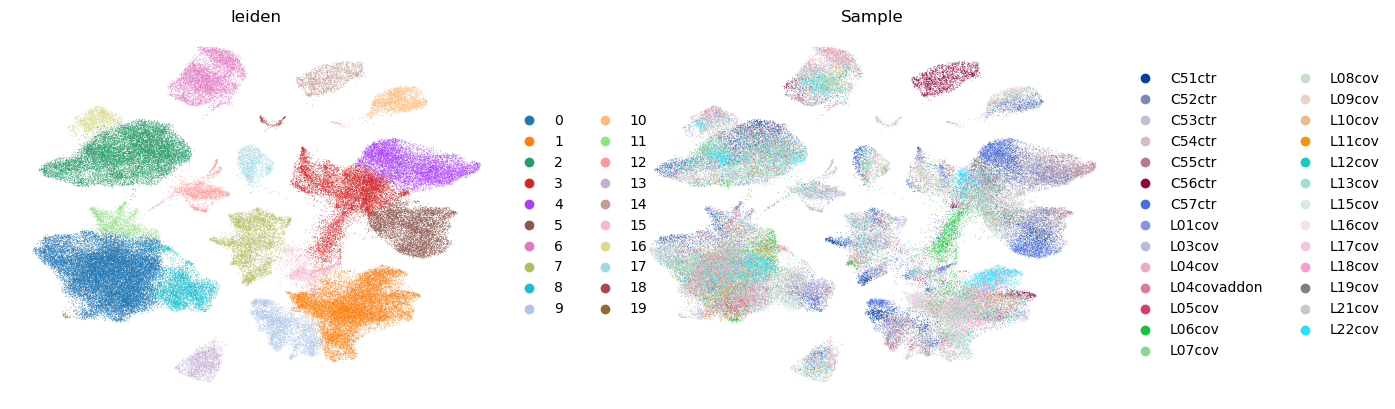

In [30]:
# Plot UMAP (1. clusters labeled 2. samples labeled)
sc.pl.umap(adata, color=['leiden', 'Sample'], frameon = False)

For the dark red cluster on the top right of the Sample diagram it is not well integrated to the other samples. It might be that there has been a gene which is missed from this sample and present in all other samples. 

In [31]:
adata.write_h5ad('integrated.h5ad')

## 7) Find markers/label cell types 

In [49]:
# Increased resolution after checking the results for the T-cells 
sc.tl.leiden(adata, resolution=0.8)

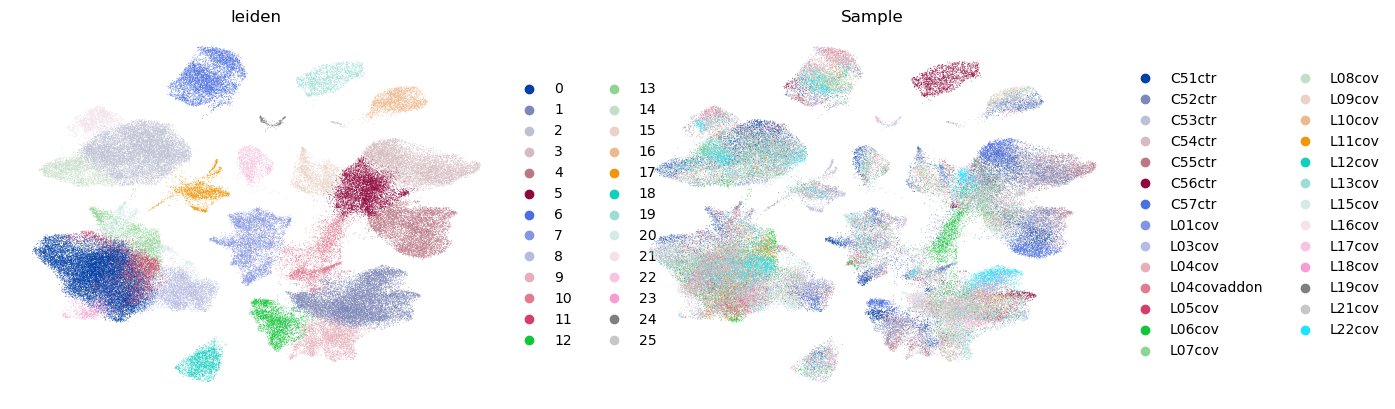

In [50]:
# UMAP plot again after increasing the resoultion 
# Plot UMAP (1. clusters labeled 2. samples labeled)
sc.pl.umap(adata, color=['leiden', 'Sample'], frameon = False)

In [51]:
"""
Perform differential gene expression analysis using Leiden clustering.
This function identifies marker genes that are differentially expressed 
across different cell clusters identified by the Leiden algorithm.
"""
sc.tl.rank_genes_groups(adata, 'leiden')

/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:429: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:431: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/usr/users/f.amirvahedibonab01/.conda/envs/data-science-env/l

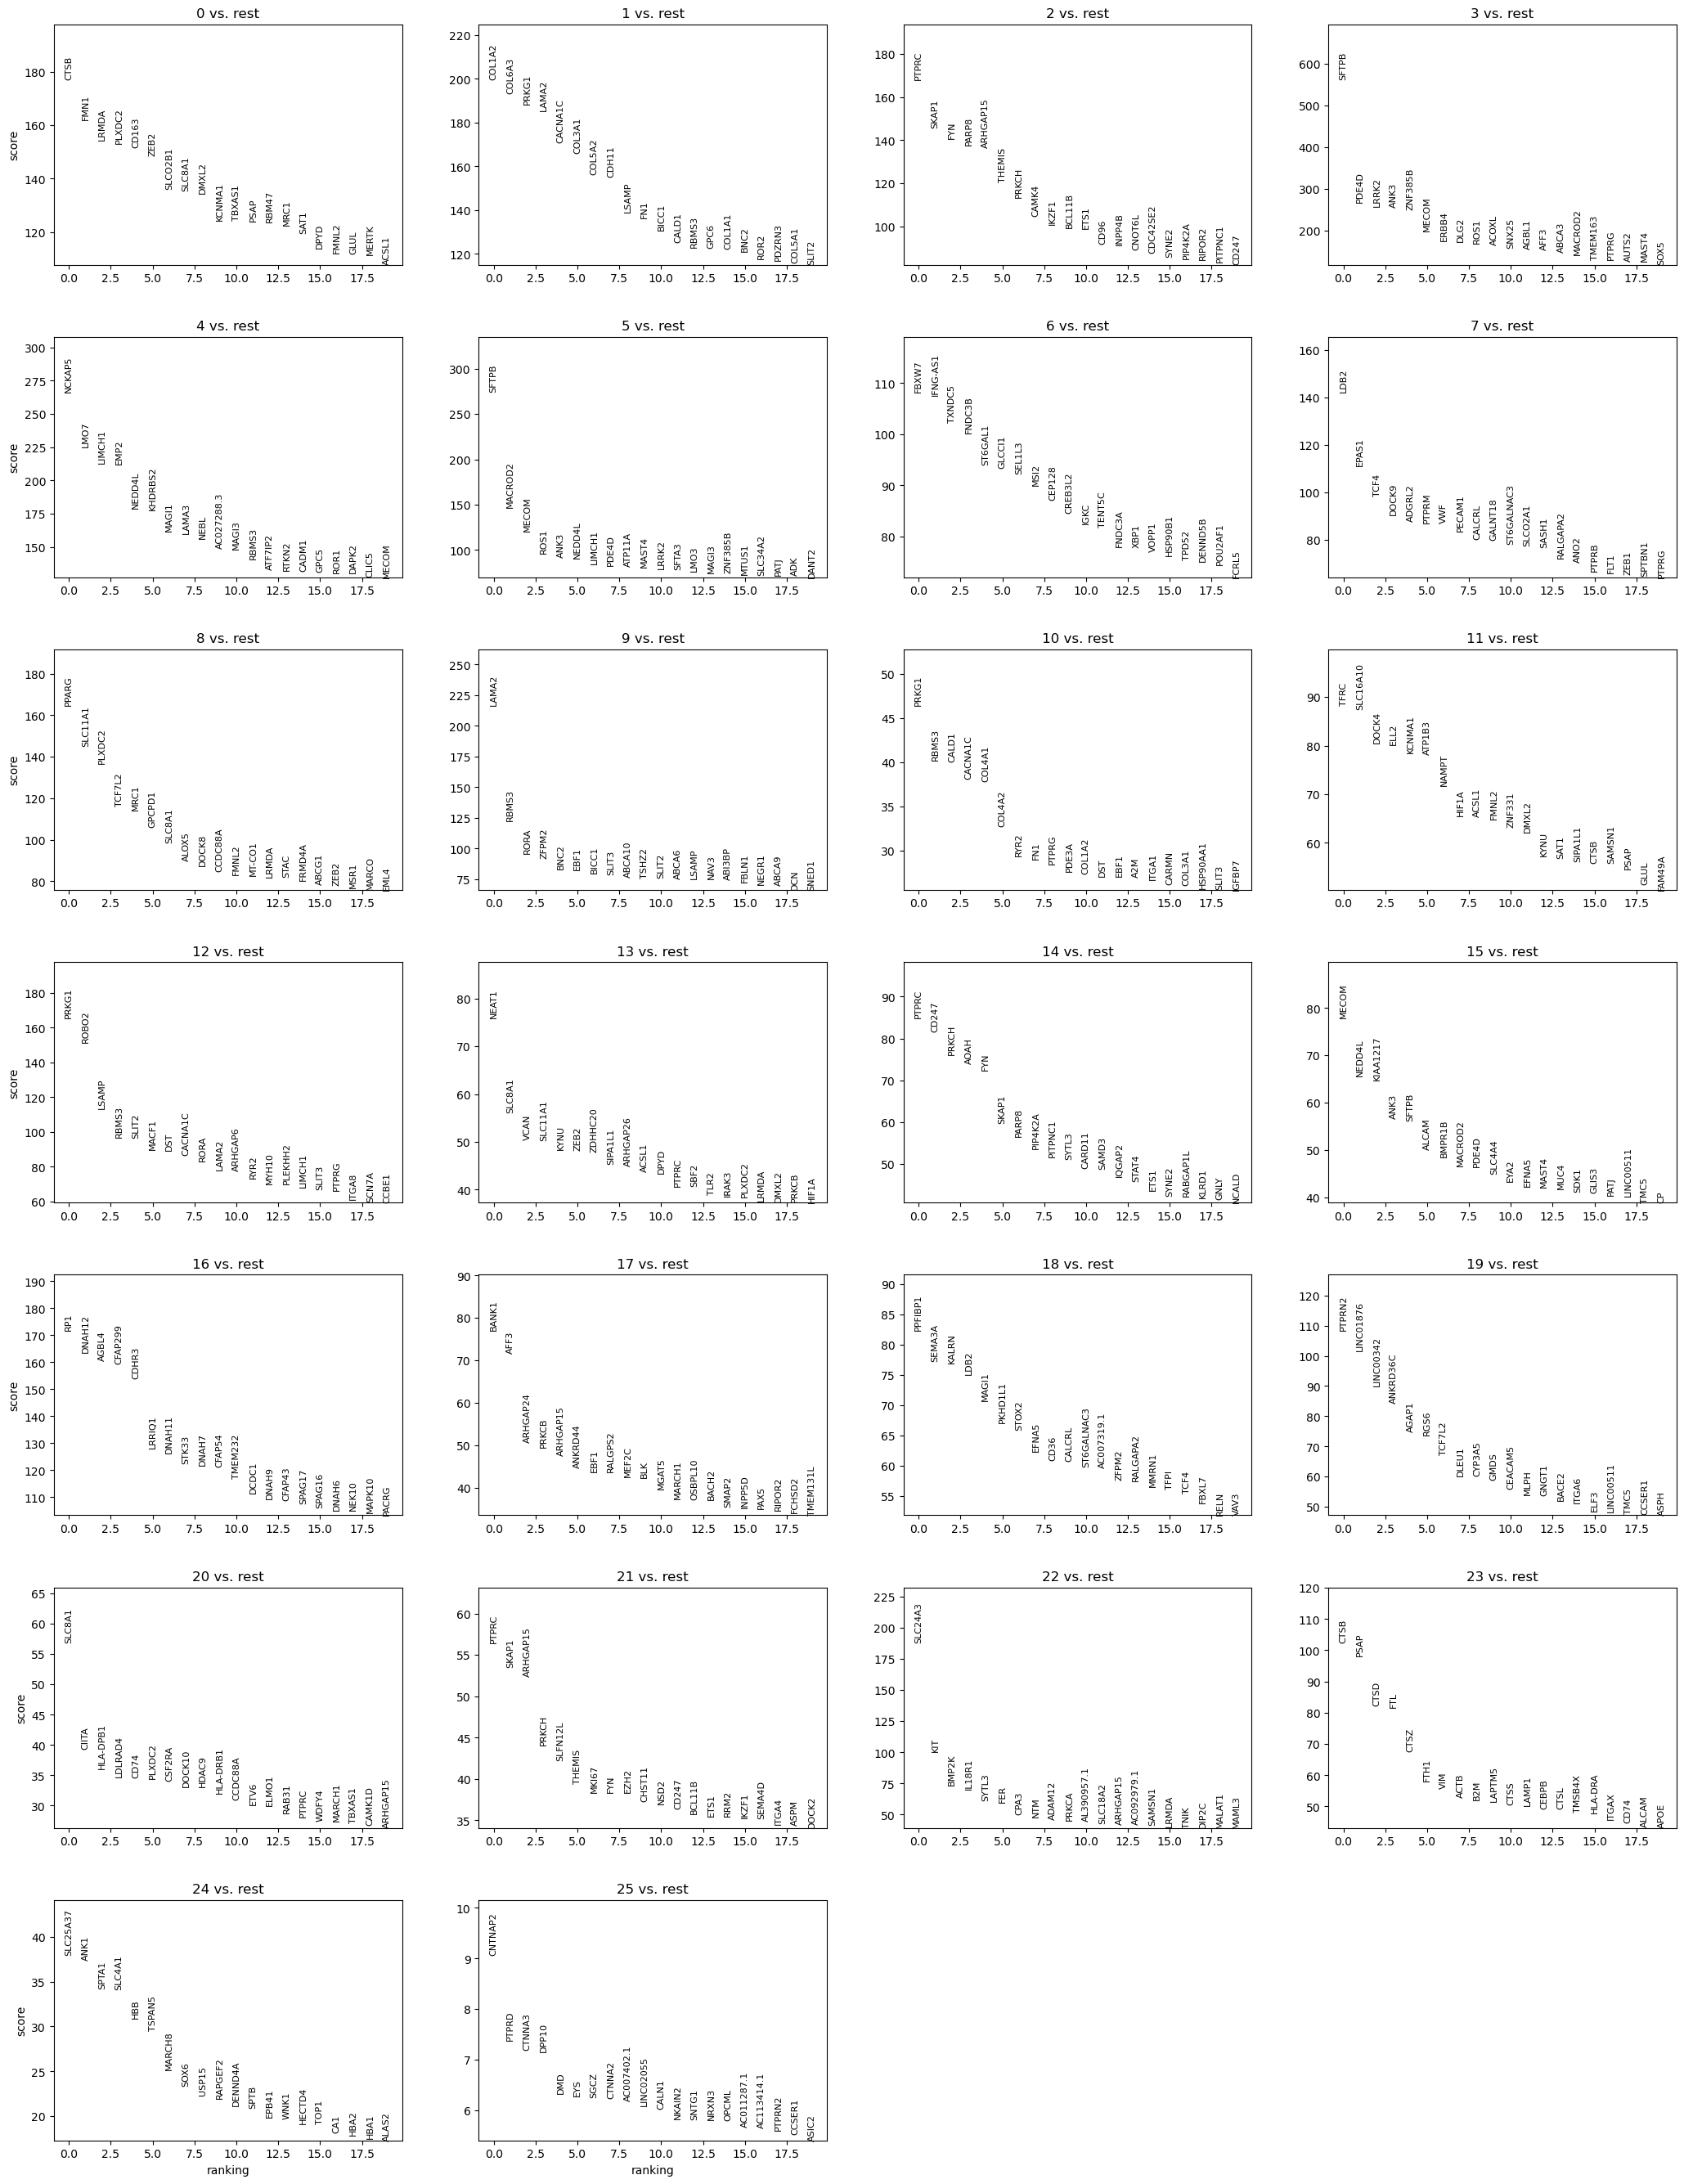

In [52]:
# Create a plot to visualize the ranking of genes
# adata: The annotated data matrix (AnnData object) containing your single-cell data
# n_genes: Number of genes to show in the plot per group (here, it is set to 20)
# sharey: If False, the y-axis for each group is scaled independently (helps if ranges of values differ greatly)
sc.pl.rank_genes_groups(adata, n_genes=20, sharey=False)


In [54]:
# Get the DataFrame containing the ranked genes
# adata: The annotated data matrix (AnnData object) containing your single-cell data
# None: Indicates that the DataFrame will contain ranked genes for all groups (clusters)
markers = sc.get.rank_genes_groups_df(adata, None)

# Filter the DataFrame to include only genes that meet specific criteria:
# (1) Adjusted p-values (pvals_adj) less than 0.05 (statistically significant)
# (2) Log fold changes (logfoldchanges) greater than 0.5 (substantial change in expression)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > 0.5)]
markers


group       names      scores  logfoldchanges     pvals  pvals_adj
0          0        CTSB  177.016815        4.529584  0.000000   0.000000
1          0        FMN1  162.005173        3.563015  0.000000   0.000000
2          0       LRMDA  154.402435        2.310086  0.000000   0.000000
3          0      PLXDC2  153.336212        2.668282  0.000000   0.000000
4          0       CD163  151.707596        4.857790  0.000000   0.000000
...      ...         ...         ...             ...       ...        ...
533413    25       BCAS4    2.327952        2.866775  0.023139   0.048332
533414    25   LINC00877    2.327521        3.994567  0.023163   0.048376
533415    25  AC119674.1    2.327494        1.883156  0.023164   0.048376
533416    25   LINC01478    2.323106        4.005044  0.023415   0.048877
533417    25   LINC02389    2.321738        3.964815  0.023494   0.049021

[88575 rows x 6 columns]

In [55]:
# Perform differential expression analysis using the SCVI model
# The SCVI (Single-cell Variational Inference) model is a probabilistic model designed for analyzing single-cell RNA sequencing data.
# It uses variational inference to model the latent distribution of the cells.
# The differential expression analysis identifies genes that are differentially expressed between groups of cells, helping to understand biological differences and similarities.
# The 'groupby' parameter specifies the key for grouping cells. Here, it is set to the 'leiden' clustering results.
# The 'leiden' algorithm clusters cells based on their gene expression profiles.
markers_scvi = model.differential_expression(groupby='leiden')

# The 'markers_scvi' variable stores the result of the differential expression analysis.
# This is typically a DataFrame containing information about the markers identified for each group,
# including p-values, log fold changes, and other statistics.
markers_scvi


DE...:   0%|          | 0/26 [00:00<?, ?it/s]

proba_de  proba_not_de  bayes_factor    scale1    scale2  \
ADORA3      0.9912        0.0088      4.724163  0.000014  0.000001   
ACP5        0.9896        0.0104      4.555494  0.000148  0.000027   
APOC1       0.9896        0.0104      4.555494  0.000125  0.000018   
STAB1       0.9896        0.0104      4.555494  0.000377  0.000028   
PLA2G7      0.9894        0.0106      4.536244  0.000203  0.000018   
...            ...           ...           ...       ...       ...   
PI4KB       0.5198        0.4802      0.079241  0.000052  0.000048   
PARG        0.5156        0.4844      0.062420  0.000076  0.000078   
TM9SF4      0.5140        0.4860      0.056015  0.000072  0.000073   
C11orf58    0.4862        0.5138     -0.055214  0.000092  0.000088   
RPRD1B      0.4472        0.5528     -0.211990  0.000055  0.000059   

          pseudocounts  delta  lfc_mean  lfc_median   lfc_std  ...  raw_mean1  \
ADORA3             0.0   0.25  5.386735    5.564891  2.809916  ...   0.018188   
ACP5               0.0   0.25  6.736420    6.905832  4.384711  ...   0.292655   
APOC1              0.0   0.25  6.459364    6.843772  3.698540  ...   0.192529   
STAB1              0.0   0.25  6.466302    6.572041  3.609875  ...   0.392107   
PLA2G7             0.0   0.25  6.739742    7.036729  3.663466  ...   0.310294   
...                ...    ...       ...         ...       ...  ...        ...   
PI4KB              0.0   0.25  0.176304    0.153663  0.409839  ...   0.046875   
PARG               0.0   0.25 -0.010965   -0.025020  0.394936  ...   0.078125   
TM9SF4             0.0   0.25  0.025554    0.037156  0.432904  ...   0.046875   
C11orf58           0.0   0.25  0.104812    0.081573  0.369927  ...   0.125000   
RPRD1B             0.0   0.25 -0.076293   -0.078413  0.344792  ...   0.046875   

          raw_mean2  non_zeros_proportion1  non_zeros_proportion2  \
ADORA3     0.000909               0.017337               0.000877   
ACP5       0.066517               0.160290               0.025524   
APOC1      0.036771               0.102135               0.018910   
STAB1      0.025264               0.253908               0.018975   
PLA2G7     0.028349               0.194537               0.018423   
...             ...                    ...                    ...   
PI4KB      0.064525               0.046875               0.059232   
PARG       0.105099               0.062500               0.093703   
TM9SF4     0.091795               0.046875               0.082587   
C11orf58   0.120775               0.109375               0.107661   
RPRD1B     0.084385               0.046875               0.076555   

          raw_normalized_mean1  raw_normalized_mean2  is_de_fdr_0.05  \
ADORA3                0.115421              0.006407            True   
ACP5                  1.650396              0.275036            True   
APOC1                 0.977546              0.164319            True   
STAB1                 3.339126              0.213548            True   
PLA2G7                2.212385              0.202101            True   
...                        ...                   ...             ...   
PI4KB                 0.374344              0.473756           False   
PARG                  0.502538              0.769989           False   
TM9SF4                0.541669              0.673320           False   
C11orf58              1.135215              0.918466           False   
RPRD1B                0.823101              0.630215           False   

          comparison  group1 group2  
ADORA3     0 vs Rest       0   Rest  
ACP5       0 vs Rest       0   Rest  
APOC1      0 vs Rest       0   Rest  
STAB1      0 vs Rest       0   Rest  
PLA2G7     0 vs Rest       0   Rest  
...              ...     ...    ...  
PI4KB     25 vs Rest      25   Rest  
PARG      25 vs Rest      25   Rest  
TM9SF4    25 vs Rest      25   Rest  
C11orf58  25 vs Rest      25   Rest  
RPRD1B    25 vs Rest      25   Rest  

[553956 rows x 22 columns]

In [56]:
# Filter the DataFrame to include only rows that meet specific criteria:
# (1) 'is_de_fdr_0.05': This column indicates whether the gene is differentially expressed (DE) with a false discovery rate (FDR) less than 0.05.
# (2) 'lfc_mean': This column represents the mean log fold change (LFC) of gene expression.
#     The filter keeps rows where 'lfc_mean' is greater than 0.5, indicating substantial changes in expression.
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]

# Display the filtered DataFrame to inspect the results.
# The resulting DataFrame, 'markers_scvi', now contains only genes that are both significantly differentially expressed (FDR < 0.05)
# and have a mean log fold change greater than 0.5.
markers_scvi


proba_de  proba_not_de  bayes_factor    scale1    scale2  \
ADORA3        0.9912        0.0088      4.724163  0.000014  0.000001   
ACP5          0.9896        0.0104      4.555494  0.000148  0.000027   
APOC1         0.9896        0.0104      4.555494  0.000125  0.000018   
STAB1         0.9896        0.0104      4.555494  0.000377  0.000028   
PLA2G7        0.9894        0.0106      4.536244  0.000203  0.000018   
...              ...           ...           ...       ...       ...   
DHRS3         0.8708        0.1292      1.908051  0.000137  0.000093   
TMEM70        0.8708        0.1292      1.908051  0.000010  0.000008   
AC125437.3    0.8708        0.1292      1.908051  0.000015  0.000011   
OBSCN         0.8706        0.1294      1.906274  0.000047  0.000031   
AC124319.1    0.8706        0.1294      1.906274  0.000009  0.000007   

            pseudocounts  delta  lfc_mean  lfc_median   lfc_std  ...  \
ADORA3               0.0   0.25  5.386735    5.564891  2.809916  ...   
ACP5                 0.0   0.25  6.736420    6.905832  4.384711  ...   
APOC1                0.0   0.25  6.459364    6.843772  3.698540  ...   
STAB1                0.0   0.25  6.466302    6.572041  3.609875  ...   
PLA2G7               0.0   0.25  6.739742    7.036729  3.663466  ...   
...                  ...    ...       ...         ...       ...  ...   
DHRS3                0.0   0.25  1.051130    0.835949  1.557443  ...   
TMEM70               0.0   0.25  0.775240    0.715170  1.379926  ...   
AC125437.3           0.0   0.25  0.790171    0.812029  1.250209  ...   
OBSCN                0.0   0.25  1.594679    1.028469  2.047935  ...   
AC124319.1           0.0   0.25  0.818633    0.771886  1.410610  ...   

            raw_mean1  raw_mean2  non_zeros_proportion1  \
ADORA3       0.018188   0.000909               0.017337   
ACP5         0.292655   0.066517               0.160290   
APOC1        0.192529   0.036771               0.102135   
STAB1        0.392107   0.025264               0.253908   
PLA2G7       0.310294   0.028349               0.194537   
...               ...        ...                    ...   
DHRS3        0.046875   0.115029               0.046875   
TMEM70       0.031250   0.010786               0.031250   
AC125437.3   0.000000   0.013287               0.000000   
OBSCN        0.046875   0.039499               0.046875   
AC124319.1   0.000000   0.009287               0.000000   

            non_zeros_proportion2  raw_normalized_mean1  raw_normalized_mean2  \
ADORA3                   0.000877              0.115421              0.006407   
ACP5                     0.025524              1.650396              0.275036   
APOC1                    0.018910              0.977546              0.164319   
STAB1                    0.018975              3.339126              0.213548   
PLA2G7                   0.018423              2.212385              0.202101   
...                           ...                   ...                   ...   
DHRS3                    0.087313              0.490792              0.828552   
TMEM70                   0.010408              0.492190              0.076037   
AC125437.3               0.012532              0.000000              0.095652   
OBSCN                    0.034995              0.621975              0.327712   
AC124319.1               0.008992              0.000000              0.061254   

            is_de_fdr_0.05  comparison  group1 group2  
ADORA3                True   0 vs Rest       0   Rest  
ACP5                  True   0 vs Rest       0   Rest  
APOC1                 True   0 vs Rest       0   Rest  
STAB1                 True   0 vs Rest       0   Rest  
PLA2G7                True   0 vs Rest       0   Rest  
...                    ...         ...     ...    ...  
DHRS3                 True  25 vs Rest      25   Rest  
TMEM70                True  25 vs Rest      25   Rest  
AC125437.3            True  25 vs Rest      25   Rest  
OBSCN                 True  25 vs Rest  

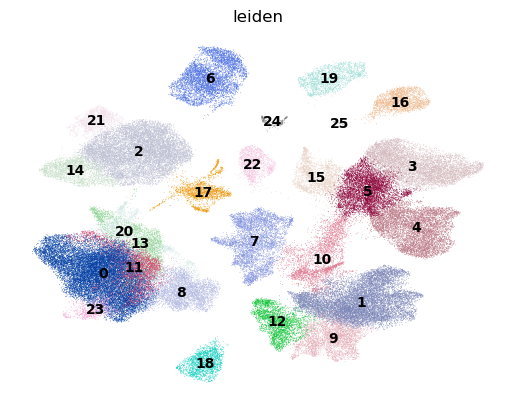

In [ ]:
# Plot a UMAP visualization of the data
# adata: The annotated data matrix (AnnData object) containing your single-cell data
# color: Specifies the column(s) in adata.obs used to color the data points, here 'leiden' clustering is used
# frameon: If False, removes the frame around the plot for a cleaner look
# legend_loc: Specifies the location of the legend on the plot. "on data" places the legend directly on the data points
sc.pl.umap(adata, color=['leiden'], frameon=False, legend_loc="on data")


In [58]:
for x in range(0, 26):
    print(f'"{x}":"", ')

"0":"", 
"1":"", 
"2":"", 
"3":"", 
"4":"", 
"5":"", 
"6":"", 
"7":"", 
"8":"", 
"9":"", 
"10":"", 
"11":"", 
"12":"", 
"13":"", 
"14":"", 
"15":"", 
"16":"", 
"17":"", 
"18":"", 
"19":"", 
"20":"", 
"21":"", 
"22":"", 
"23":"", 
"24":"", 
"25":"", 


{"0":"CD4+ T-cell", 
"1":"fibroblast", 
"2":"CD8+ T-cell", 
"3":"AT2", 
"4":"AT1", 
"5":"AT2", 
"6":"", 
"7":"endothelial cells", 
"8":"macrophages", 
"9":"", 
"10":"smoooth muscle", 
"11":"macrophages", 
"12":"", 
"13":"monocytes", 
"14":"", 
"15":"", 
"16":"", 
"17":"", 
"18":"", 
"19":"Epithelial cells ", 
"20":"dendritic cells", 
"21":"", 
"22":"", 
"23":"macrophages", 
"24":"", 
"25":"", 
}

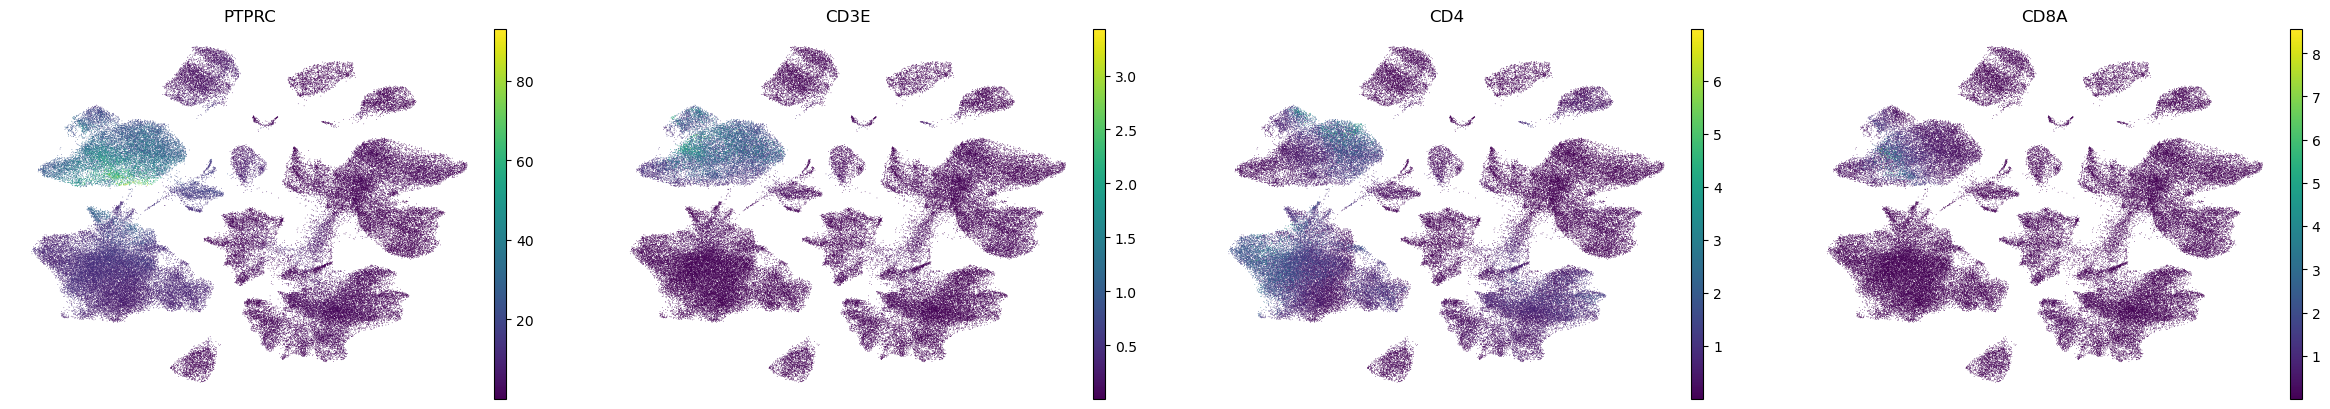

In [59]:
# Almost all datasets have a cluster for the blood cells.
# Specific markers for blood cells can be used as indicators for adjusting the resolution of the leiden clustering algorithm.
# Common markers for blood cells include PTPRC(CD45), CD3E (for T-cells), and CD4 (for CD4+ T-cells).

# Plot a UMAP (Uniform Manifold Approximation and Projection) visualization of the data
# adata: The annotated data matrix (AnnData object) containing your single-cell data
# color: Specifies the genes to use for coloring the data points. Here, blood cell markers PTPRC, CD3E, and CD4 are used.
# frameon: If False, removes the frame around the plot for a cleaner look
# layer: Specifies the data layer to use for plotting. 'scvi_normalized' indicates that the SCVI-normalized data should be used.
sc.pl.umap(adata, color=['PTPRC', 'CD3E', 'CD4', 'CD8A'], frameon=False, layer='scvi_normalized')


Since CD4 and CD8 positive T-cells are both in the cluster 2 so the resoultion should increase to be able to split them from each other. 

In [61]:
markers[markers.names == 'CD4']

group names     scores  logfoldchanges          pvals      pvals_adj
755        0   CD4  29.706465        1.937180  1.896502e-189  1.422276e-188
43495      2   CD4  12.011976        0.974763   4.634519e-33   1.209346e-32
172789     8   CD4   9.650022        1.034026   7.881769e-22   2.559113e-21
236157    11   CD4   4.253523        0.587673   2.162812e-05   3.989685e-05
426818    20   CD4   9.193485        1.549492   1.029425e-19   5.224615e-19
448974    21   CD4   7.136638        1.334970   1.456888e-12   3.904951e-12
492362    23   CD4   8.106504        1.770336   1.901730e-15   5.462155e-15

In [62]:
markers[markers.names == 'CD8A']

group names     scores  logfoldchanges          pvals      pvals_adj
43003      2  CD8A  22.799486        4.681430  1.329421e-112  6.168260e-112
299143    14  CD8A   5.722955        1.999221   1.175673e-08   2.664492e-08
448464    21  CD8A   9.070741        3.170733   3.473158e-19   1.058491e-18

PanglaoDB is a database of cell type markers that can be useful for labeling cell types in single-cell RNA sequencing data. Here are some key points about PanglaoDB:

1. It provides a comprehensive collection of cell-type specific markers across various tissues and species.

2. The rPanglaoDB R package allows users to download and merge labeled single-cell RNA-seq data from the PanglaoDB database into a Seurat object.

3. Functions like getSampleComposition() can be used to retrieve cell-type composition of samples in the PanglaoDB database.

4. The getMarkers() function allows users to query samples with specific gene expression patterns, which is helpful for identifying cell types based on marker genes.

5. PanglaoDB can be accessed through wrapper functions in tools like decoupler, making it easy to integrate into single-cell analysis workflows.

While PanglaoDB is a valuable resource for cell type annotation, it's important to note that it's one of many tools available for this purpose. Other methods and databases may also be useful depending on the specific research context and data types.

Citations:
[1] https://cran.r-project.org/web/packages/rPanglaoDB/rPanglaoDB.pdf
[2] https://github.com/dosorio/rPanglaoDB/
[3] https://genomemedicine.biomedcentral.com/articles/10.1186/s13073-023-01249-5
[4] https://www.nature.com/articles/s41467-022-28803-w
[5] https://decoupler-py.readthedocs.io/en/latest/notebooks/cell_annotation.html

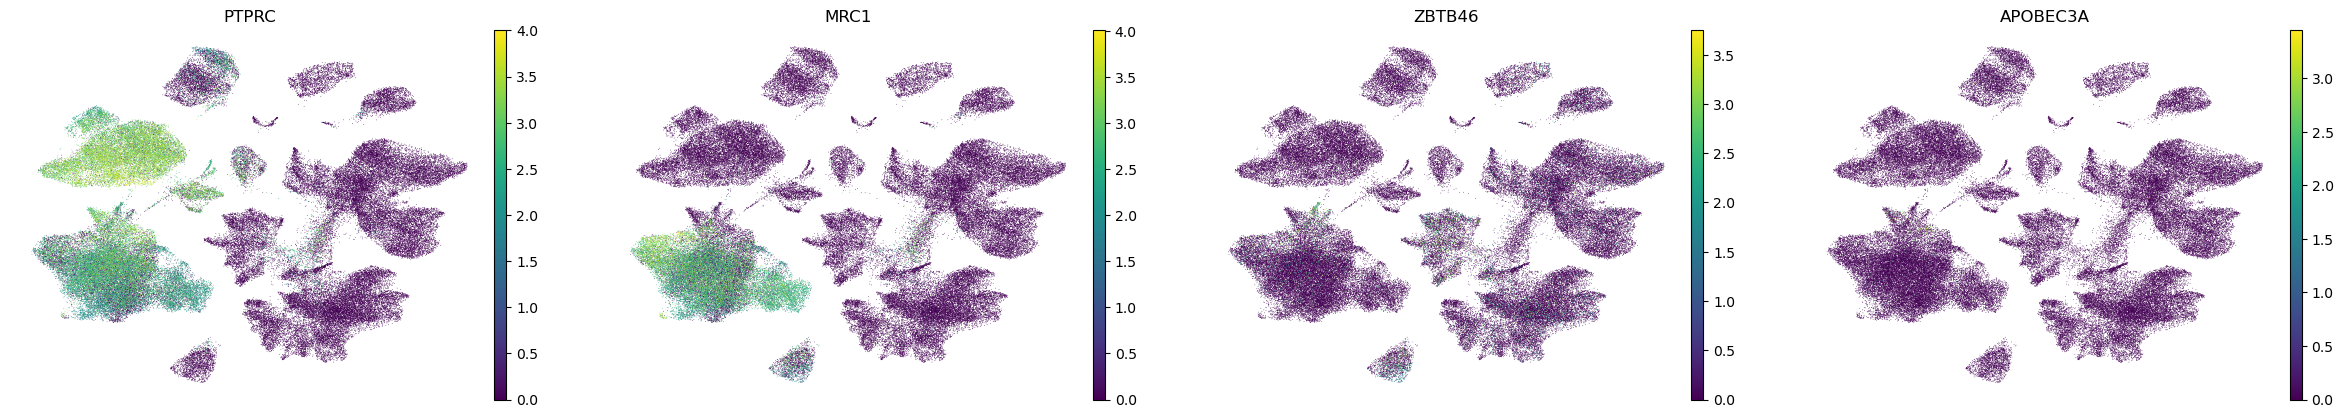

In [67]:
sc.pl.umap(adata, color=['PTPRC', 'MRC1', 'ZBTB46', 'APOBEC3A'], frameon=False)


In [ ]:
# Look for the clusters which have the gene marker for the dendritic cells 
markers[markers.names == 'ZBTB46']

group   names     scores  logfoldchanges          pvals      pvals_adj
149452     7  ZBTB46  23.548389        2.468266  1.192404e-116  1.203475e-115
213715    10  ZBTB46   7.030841        0.885836   2.444940e-12   1.990677e-11
383824    18  ZBTB46  17.233540        2.585268   6.382981e-62   6.387778e-61
426263    20  ZBTB46  16.541634        2.728270   2.956211e-57   3.139832e-56

In [69]:
# Find which clsuter has the significantly expressed amount of APOBEC3A (for monocytes)
markers[markers.names == 'APOBEC3A']

group     names     scores  logfoldchanges         pvals     pvals_adj
5612       0  APOBEC3A   3.336063        0.720536  8.512223e-04  1.181123e-03
277396    13  APOBEC3A  11.833314        5.285182  1.497013e-31  5.672302e-31

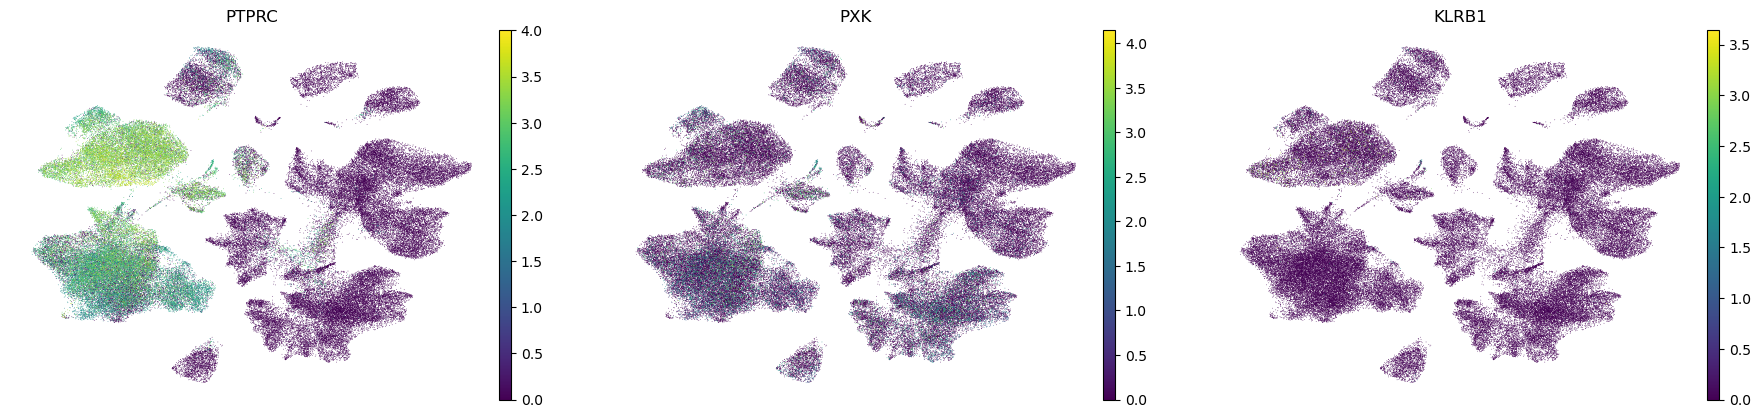

In [78]:
# Move on with the rest of the immune cells (B cells (PXK) & NK-cells (KLRB1))
# Use B-cells and NK-cells markers 
sc.pl.umap(adata, color=['PTPRC', 'PXK', 'KLRB1'], frameon=False)


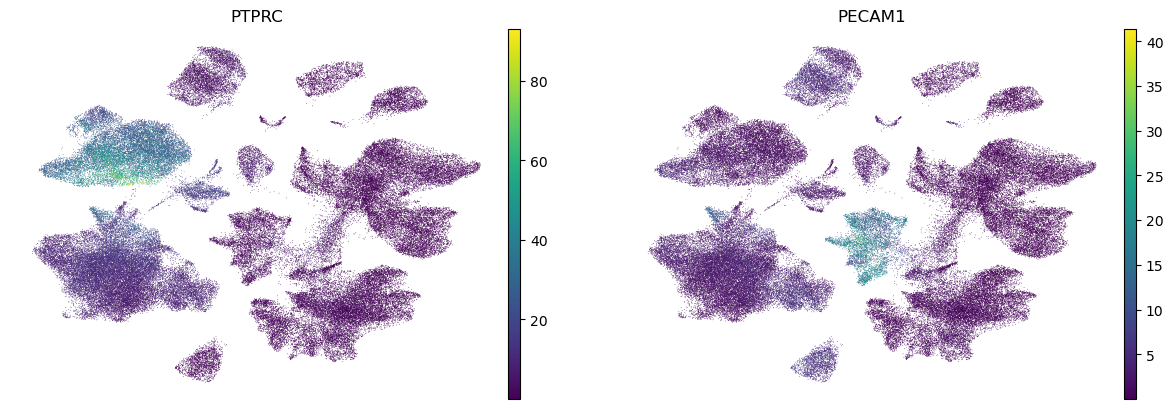

In [72]:
# Work on other cell types which are common for every cell types (e.g., endothelial cells PECAM1 marker)
sc.pl.umap(adata, color=['PTPRC', 'PECAM1'], frameon=False, layer='scvi_normalized')


In [79]:
markers[markers.names == 'PECAM1']

group   names     scores  logfoldchanges          pvals      pvals_adj
806        0  PECAM1  28.620434        1.030764  1.033999e-176  7.425137e-176
128292     6  PECAM1  19.573895        1.228914   1.550919e-82   8.312926e-82
149149     7  PECAM1  83.765678        4.258114   0.000000e+00   0.000000e+00
170581     8  PECAM1  42.562332        2.371264   0.000000e+00   0.000000e+00
235452    11  PECAM1   7.473453        0.586653   9.937965e-14   2.609221e-13
277140    13  PECAM1  19.072798        1.640722   2.184497e-76   1.485570e-75
383685    18  PECAM1  22.650068        2.080461  9.275844e-101   1.381070e-99
427497    20  PECAM1   6.283852        0.626399   4.130933e-10   1.575330e-09
493561    23  PECAM1   6.125701        0.748896   1.397294e-09   3.321887e-09

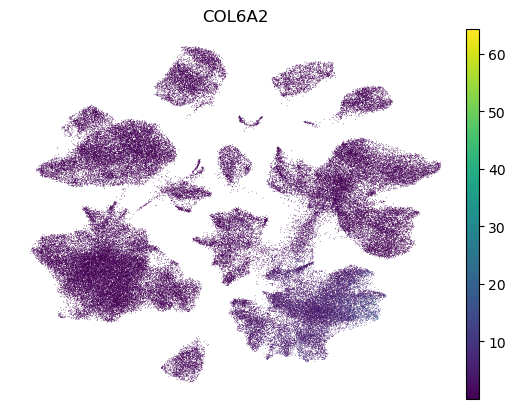

In [73]:
# Go for connective tissue, fibroblast 
sc.pl.umap(adata, color=['COL6A2'], frameon=False, layer='scvi_normalized')


In [74]:
markers[markers.names == 'COL6A2']

group   names     scores  logfoldchanges          pvals      pvals_adj
21370      1  COL6A2  79.365494        4.455454   0.000000e+00   0.000000e+00
191861     9  COL6A2  37.539101        3.214027  5.812125e-261  1.394517e-259
213157    10  COL6A2  17.714363        1.767614   2.344682e-67   2.436868e-65
256011    12  COL6A2  18.879473        2.030024   3.186871e-75   2.241646e-74

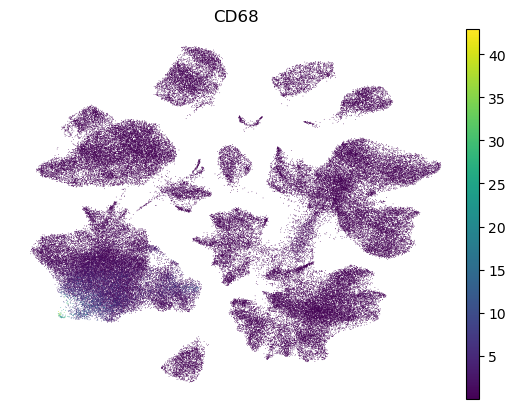

group names     scores  logfoldchanges          pvals      pvals_adj
344        0  CD68  43.691128        2.932934   0.000000e+00   0.000000e+00
170852     8  CD68  27.467745        2.787843  1.233543e-153  1.254505e-152
234932    11  CD68  12.485546        1.655205   5.654500e-35   2.417716e-34
429069    20  CD68   3.486639        0.568163   5.008509e-04   1.256166e-03
490076    23  CD68  36.992397        5.205758  2.357328e-176  3.192959e-175

In [ ]:
# Go for macrophages 
sc.pl.umap(adata, color=['CD68'], frameon=False, layer='scvi_normalized')
display(markers[markers.names == 'CD68'])

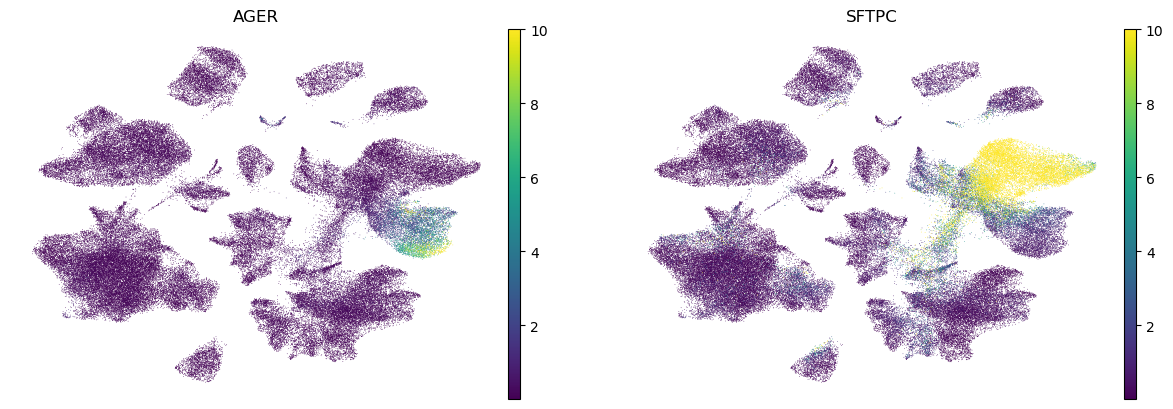

group names     scores  logfoldchanges  pvals  pvals_adj
85365     4  AGER  56.651882        7.191167    0.0        0.0

group  names      scores  logfoldchanges          pvals      pvals_adj
63943      3  SFTPC  104.823982        6.337460   0.000000e+00   0.000000e+00
106682     5  SFTPC   39.484711        2.992031  5.315925e-304  1.320059e-302

In [ ]:
# Go for Lung cells (AT1, AT2)
sc.pl.umap(adata, color=['AGER', 'SFTPC'], frameon=False, layer='scvi_normalized', vmax=10)
display(markers[markers.names == 'AGER'])
display(markers[markers.names == 'SFTPC'])

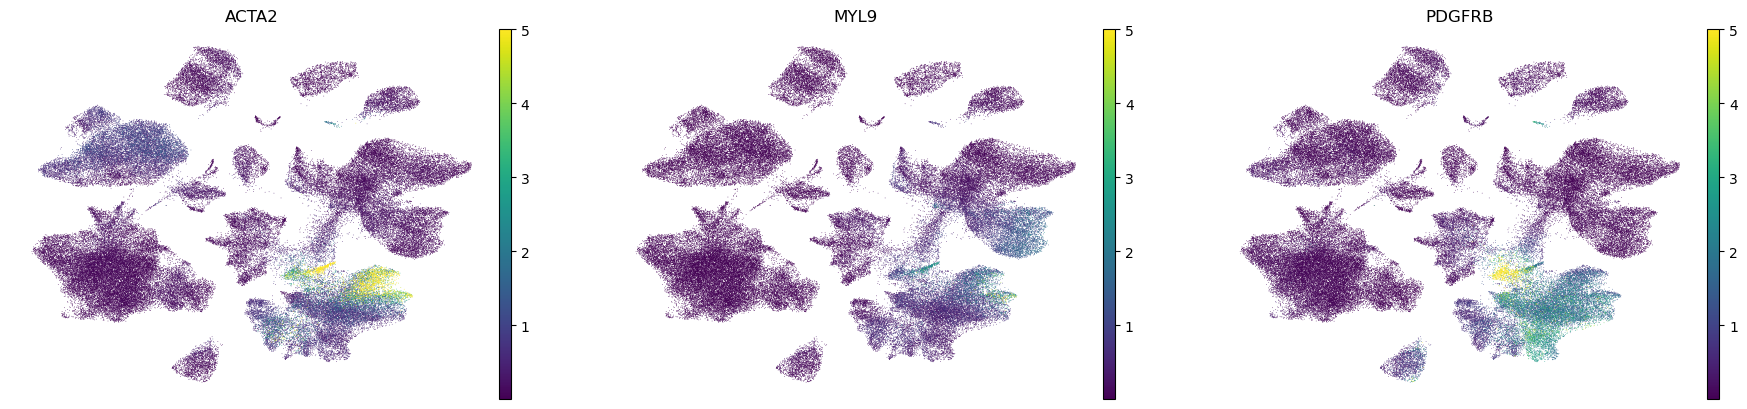

group  names     scores  logfoldchanges         pvals     pvals_adj
21631      1  ACTA2  42.743603        3.569091  0.000000e+00  0.000000e+00
193479     9  ACTA2   7.135282        0.929647  1.154910e-12  3.882990e-12
213135    10  ACTA2  19.164106        2.598356  6.074755e-78  8.296713e-76
256554    12  ACTA2   9.640398        1.458903  1.104390e-21  3.597329e-21

group   names     scores  logfoldchanges          pvals      pvals_adj
21547      1  PDGFRB  48.817490        3.724452   0.000000e+00   0.000000e+00
191964     9  PDGFRB  28.046883        3.204251  8.266109e-157  1.267946e-155
213098    10  PDGFRB  22.223520        2.872108  1.744576e-102  4.890782e-100
257175    12  PDGFRB   5.782041        0.843148   8.127158e-09   1.854130e-08

In [ ]:
# Go for Perycites
sc.pl.umap(adata, color=['ACTA2', 'MYL9', 'PDGFRB'], frameon=False, layer='scvi_normalized', vmax=5)
# Differentiate between smoooth muscle and the precites 
display(markers[markers.names == 'ACTA2'])
display(markers[markers.names == 'PDGFRB'])

In [ ]:
# If you are not short about the type of the cluster search for it by its index find the highly expressed genes in that cluster and 
# do the reverse searching in the PaglaoDB to see which cell types are offered to have that marker. 
markers_scvi[markers_scvi.group1 == '23']

proba_de  proba_not_de  bayes_factor    scale1    scale2  \
CCL7        0.9964        0.0036      5.623212  0.000060  0.000002   
IL1RN       0.9958        0.0042      5.468460  0.000168  0.000005   
MMP9        0.9952        0.0048      5.334326  0.000214  0.000005   
HSD3B7      0.9952        0.0048      5.334326  0.000090  0.000006   
MFSD12      0.9942        0.0058      5.144079  0.000236  0.000035   
...            ...           ...           ...       ...       ...   
C17orf58    0.9278        0.0722      2.553376  0.000005  0.000002   
RPL28       0.9278        0.0722      2.553376  0.000135  0.000061   
HOXB6       0.9278        0.0722      2.553376  0.000001  0.000001   
SNX3        0.9278        0.0722      2.553376  0.000170  0.000066   
SAMSN1      0.9278        0.0722      2.553376  0.000331  0.000316   

          pseudocounts  delta  lfc_mean  lfc_median   lfc_std  ...  raw_mean1  \
CCL7               0.0   0.25  7.388680    7.599571  3.042992  ...   0.091245   
IL1RN              0.0   0.25  6.894638    7.006876  3.038515  ...   0.723797   
MMP9               0.0   0.25  7.538063    7.733350  2.922077  ...   0.409371   
HSD3B7             0.0   0.25  5.034310    4.842970  2.244007  ...   0.320592   
MFSD12             0.0   0.25  3.012282    3.001889  1.203329  ...   0.902588   
...                ...    ...       ...         ...       ...  ...        ...   
C17orf58           0.0   0.25  1.830730    1.784337  1.587514  ...   0.016030   
RPL28              0.0   0.25  1.519932    1.594357  1.695439  ...   0.401972   
HOXB6              0.0   0.25  1.126860    1.201695  2.381625  ...   0.002466   
SNX3               0.0   0.25  1.741441    1.658879  1.363847  ...   0.602958   
SAMSN1             0.0   0.25  1.780268    1.563430  2.839357  ...   0.922317   

          raw_mean2  non_zeros_proportion1  non_zeros_proportion2  \
CCL7       0.000972               0.054254               0.000768   
IL1RN      0.008444               0.293465               0.006296   
MMP9       0.002694               0.103576               0.001778   
HSD3B7     0.007620               0.254007               0.007221   
MFSD12     0.046782               0.482121               0.042311   
...             ...                    ...                    ...   
C17orf58   0.002453               0.014797               0.002398   
RPL28      0.058022               0.250308               0.043283   
HOXB6      0.001407               0.002466               0.001379   
SNX3       0.085458               0.404439               0.073039   
SAMSN1     0.341637               0.358816               0.168381   

          raw_normalized_mean1  raw_normalized_mean2  is_de_fdr_0.05  \
CCL7                  0.337667              0.004946            True   
IL1RN                 2.239154              0.051380            True   
MMP9                  1.438573              0.016155            True   
HSD3B7                0.915957              0.047065            True   
MFSD12                2.602747              0.330619            True   
...                        ...                   ...             ...   
C17orf58              0.049881              0.016439            True   
RPL28                 1.139813              0.354870            True   
HOXB6                 0.002779              0.008570            True   
SNX3                  1.914209              0.593964            True   
SAMSN1                2.394808              3.100151            True   

          comparison  group1 group2  
CCL7      23 vs Rest      23   Rest  
IL1RN     23 vs Rest      23   Rest  
MMP9      23 vs Rest      23   Rest  
HSD3B7    23 vs Rest      23   Rest  
MFSD12    23 vs Rest      23   Rest  
...              ...     ...    ...  
C17orf58  23 vs Rest      23   Rest  
RPL28     23 vs Rest      23   Rest  
HOXB6     23 vs Rest      23   Rest  
SNX3      23 vs Rest      23   Rest  
SAMSN1    23 vs Rest      23   Rest  

[2563 rows x 22 columns]

In [88]:
for item in markers_scvi[markers_scvi.group1 == '20'][0:1000].index:
    print(item)

FLT3
CLNK
MIR924HG
CCDC26
IGSF21
CLEC5A
CSF2RA
C1QB
CLEC4F
CLEC10A
TSPAN33
EBI3
PLEK2
SLC11A1
HLA-DQB1
C1QA
HLA-DQA2
RTN1
HLA-DPB1
HLA-DRB5
IL1R2
OLR1
AC005162.1
CALHM6
HLA-DQA1
LINC02149
MARCO
MS4A4E
P2RY13
HLA-DPA1
CLEC9A
MMP12
ADORA3
HLA-DRB1
AC020656.1
SPP1
AC133065.1
ANKRD22
AC004593.3
ZNF366
AC035139.2
AC060234.3
C1QC
MGAM
CD163
CD80
MCEMP1
SLC24A4
NLRP3
NPFFR1
AL162414.1
AC013457.1
FCGR3A
GNAO1
FCN1
AL034397.3
CCR6
CLEC4D
IFI30
CEACAM4
IDO1
LYZ
VSIG4
TVP23A
CD14
IDO2
C17orf64
AP001636.3
IL1B
CCL18
VENTX
MS4A6E
MS4A6A
CD74
FGL2
ASGR2
KCNK13
F13A1
MEIKIN
FCGBP
ST18
APOC1
IL4I1
AC069023.1
CPVL
PAX5
CIITA
CLEC12B
DLGAP2
PADI2
SMIM25
CD300LB
GAPT
SIRPB2
AQP9
HLA-DRA
AC090559.1
GRN
HLA-DQB2
RGS18
AL844908.1
CD300E
CD68
CTSB
GPR141
TESPA1
S100A9
STAB1
AC004817.3
PLA2G7
GPNMB
CTLA4
AC243829.4
LILRB4
TLR10
CD1D
NCF2
FPR3
RUFY4
PALD1
MMP9
ZNF831
LILRB2
CXCL10
DMP1
SLC8A1-AS1
LINC02207
MS4A14
LINC00877
THRA1/BTR
TMEM52B
FPR1
TNFRSF11A
RUNX3
HK3
LY86
HRH2
HTR7
FFAR2
AC064805.1
SIGLEC1
LST1


Select the top genes for the specific cluster from the top list and go to DAVID!
DAVID (Database for Annotation, Visualization, and Integrated Discovery) is a comprehensive bioinformatics resource that provides tools for functional annotation and enrichment analysis of gene lists. Here's an overview of DAVID and its applications:

### General Use:

1. **Functional Annotation**: DAVID rapidly appends descriptive data from several public databases to lists of genes[1][5].

2. **Gene Ontology Analysis**: The GoCharts tool assigns genes to Gene Ontology functional categories based on user-selected classifications and term specificity levels[1][5].

3. **Pathway Analysis**: KeggCharts assigns genes to KEGG metabolic processes and enables users to view genes in the context of biochemical pathway maps[1][5].

4. **Protein Domain Analysis**: DomainCharts groups genes according to PFAM conserved protein domains[1][5].

5. **Visualization**: DAVID provides exploratory visualization tools that promote discovery through functional classification, biochemical pathway maps, and conserved protein domain architectures[5].

6. **Integration**: It integrates multiple sources of functional annotations, allowing for comprehensive analysis[3].

### Use in Single-Cell Data Analysis:

While DAVID was not specifically designed for single-cell data analysis, it can be applied to gene lists derived from single-cell experiments:

1. **Functional Enrichment**: DAVID can be used to identify enriched biological themes, particularly GO terms, in gene lists obtained from single-cell RNA sequencing (scRNA-seq) data analysis[3].

2. **Pathway Mapping**: Genes identified as differentially expressed in specific cell populations can be visualized on BioCarta & KEGG pathway maps[3].

3. **Gene Group Discovery**: DAVID can help discover enriched functional-related gene groups within cell type-specific gene signatures[3].

4. **Annotation Integration**: The DAVID Knowledgebase integrates heterogeneous gene annotation resources, which is valuable for interpreting complex single-cell datasets[9].

It's important to note that while DAVID is a powerful tool, it may have limitations when dealing with very large gene lists typically generated by single-cell experiments. Researchers might need to use DAVID in combination with other specialized single-cell analysis tools to fully leverage the complexity of single-cell data[6].

In conclusion, DAVID accelerates the analysis of genome-scale datasets by facilitating the transition from data collection to biological meaning, making it a valuable resource for both bulk and single-cell genomics research[1][5].

Citations:
[1] https://pubmed.ncbi.nlm.nih.gov/12734009/
[2] https://mediatum.ub.tum.de/doc/1634060/h4x9xa1cjg42z7mkqj74iete7.Thesis_DavidFischer.pdf
[3] https://davidbioinformatics.nih.gov
[4] https://genomebiology.biomedcentral.com/articles/10.1186/s13059-020-1926-6
[5] https://genomebiology.biomedcentral.com/articles/10.1186/gb-2003-4-5-p3
[6] https://www.ncbi.nlm.nih.gov/books/NBK569559/
[7] https://ngdc.cncb.ac.cn/databasecommons/database/id/3061
[8] https://bioinformatics.ccr.cancer.gov/docs/b4b/Module3_Pathway_Analysis/Lesson18/
[9] https://bioinformaticshome.com/tools/rna-seq/descriptions/DAVID-Bioinformatics-Resources.html
[10] https://academic.oup.com/nar/article/50/W1/W216/6553115?login=false

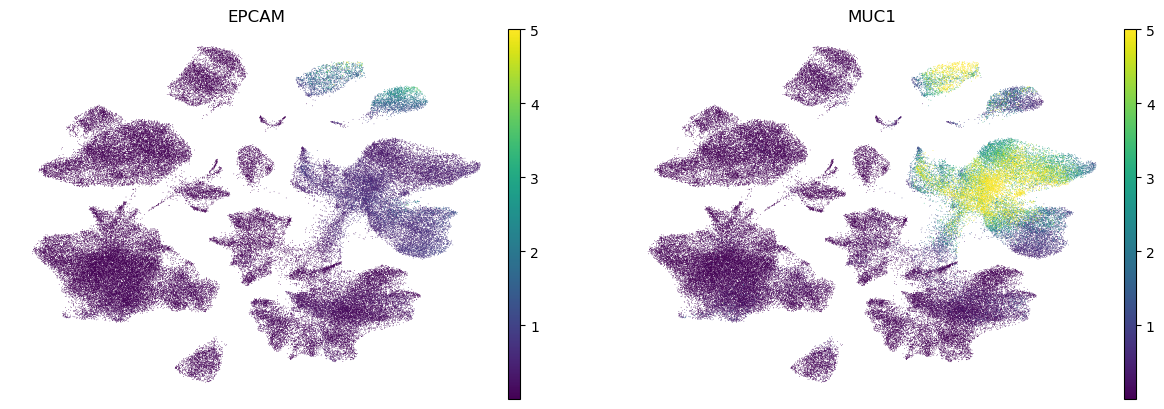

group  names     scores  logfoldchanges          pvals      pvals_adj
66309      3  EPCAM   7.555326        0.871555   4.637988e-14   1.038212e-13
86107      4  EPCAM  19.904873        2.353759   9.563681e-86   5.998345e-85
107601     5  EPCAM  15.240252        1.851927   1.633265e-51   1.081365e-50
320895    15  EPCAM   7.070117        1.398390   2.033136e-12   9.743139e-12
341410    16  EPCAM  24.904715        4.058376  3.411767e-121  3.701176e-120
405079    19  EPCAM  20.697674        3.867896   8.638799e-86   7.318420e-85

group names     scores  logfoldchanges          pvals      pvals_adj
64081      3  MUC1  55.327518        3.468521   0.000000e+00   0.000000e+00
86969      4  MUC1  11.438745        0.787350   4.840326e-30   1.717083e-29
106567     5  MUC1  60.829987        3.889525   0.000000e+00   0.000000e+00
319751    15  MUC1  20.770285        2.272465   4.320834e-88   8.742611e-87
343248    16  MUC1   8.130048        0.923100   6.913436e-16   2.083713e-15
404979    19  MUC1  24.973593        2.928946  5.414113e-119  5.682418e-118

In [89]:
# Go for the Epithelial cells 
sc.pl.umap(adata, color=['EPCAM', 'MUC1'], frameon=False, layer='scvi_normalized', vmax=5)
# Differentiate between smoooth muscle and the precites 
display(markers[markers.names == 'EPCAM'])
display(markers[markers.names == 'MUC1'])

In [90]:
# Go for the Neuronal cells 
sc.pl.umap(adata, color=['NEF4', 'DISP2'], frameon=False, layer='scvi_normalized', vmax=5)
# Differentiate between smoooth muscle and the precites 
display(markers[markers.names == 'EPCAM'])
display(markers[markers.names == 'MUC1'])

KeyError: 'Could not find key PRPH in .var_names or .obs.columns.'

<Figure size 1455.6x480 with 0 Axes>